<!DOCTYPE html>
<html>
<head>
<style>
h1 {
    text-align: center;
    font-family: 'Times New Roman', Gadget, sans-serif;
    color: blue;
}
</style>
</head>
<body>
<h1>BÀI TẬP LỚN</h1>
<h1>Chủ đề 49: BOOK RECOMMENDATION</h1>
<h1>Học phần: Hệ hỗ trợ quyết định</h1>
<h1>Mã lớp: 150330</h1>
<h1>GVHD: TS. Lê Hải Hà</h1>
<h1>Nhóm số: 1</h1>
</body>
</html>


## `Tổng quan`

### Tổng quan về chủ đề
- **Chủ đề**: 49
- **Tên chủ đề**: Book Recommendation
- **Dataset**: [Book Recommendation (Good Book API)](https://www.kaggle.com/datasets/imtkaggleteam/book-recommendation-good-book-api/data)
- **Mô tả**: Dataset chứa các thông tin cơ bản về các quyển sách thu thập được từ trang Goodbook.
- **Nhiệm vụ**: Xây dựng một hệ thống gợi ý sách để giúp người dùng có các quyết định tốt hơn khi mua sách.

### Tổng quan về dataset

Ý nghĩa của các cột trong dataset:

<style>
.table {
  width: 100%;
  border-collapse: collapse;
  font-family: Arial, sans-serif;
}

.table th, .table td {
  border: 1px solid #dddddd;
  padding: 8px;
  text-align: center;
}

.table th {
  background-color: #4CAF50;
  color: white;
  font-weight: bold;
}

.table tr:nth-child(even) {
  background-color: #f2f2f2;
}

.table tr:hover {
  background-color: #ddd;
}

.table td {
  background-color: #ffffff;
  color: #333333;
}

.table tr:nth-child(even) td {
  background-color: #e6f7ff;
}
</style>

<table class="table">
  <tr>
    <th>Cột</th>
    <th>Ý nghĩa</th>
  </tr>
  <tr>
    <td>bookID</td>
    <td>Mã định danh duy nhất cho mỗi quyển sách</td>
  </tr>
  <tr>
    <td>title</td>
    <td>Tiêu đề của quyển sách</td>
  </tr>
  <tr>
    <td>authors</td>
    <td>Tác giả của quyển sách</td>
  </tr>
  <tr>
    <td>average_rating</td>
    <td>Đánh giá trung bình của quyển sách</td>
  </tr>
  <tr>
    <td>isbn</td>
    <td>Mã số tiêu chuẩn quốc tế cho sách (ISBN 10) có tính chất thương mại duy nhất để xác định một quyển sách.</td>
  </tr>
  <tr>
    <td>isbn13</td>
    <td>ISBN của quyển sách nhưng có 13 chữ số để tăng tính khả dụng của ISBN trên toàn thế giới</td>
  </tr>
  <tr>
    <td>language_code</td>
    <td>Mã ngôn ngữ chỉ định quyển sách được viết bằng ngôn ngữ nào</td>
  </tr>
  <tr>
    <td>num_pages</td>
    <td>Số trang trong quyển sách</td>
  </tr>
  <tr>
    <td>ratings_count</td>
    <td>Tổng số lượt đánh giá cho quyển sách</td>
  </tr>
  <tr>
    <td>text_reviews_count</td>
    <td>Tổng số lượt đánh giá bằng văn bản cho quyển sách</td>
  </tr>
  <tr>
    <td>publication_date</td>
    <td>Ngày xuất bản của quyển sách</td>
  </tr>
  <tr>
    <td>publisher</td>
    <td>Nhà xuất bản của quyển sách</td>
  </tr>
</table>


## `1. Phát biểu bài toán`

**Mô tả bài toán**: Chúng ta muốn xây dựng một hệ thống gợi ý sách dựa trên dữ liệu từ Book Recommendation (Good Book API) trên Kaggle để giúp người dùng có thể tìm được các quyển sách phù hợp với sở thích và yêu cầu của họ.

**Đầu vào**:
- Dataset Book Recommendation (Good Book API), bao gồm các thông tin cơ bản về các quyển sách như tiêu đề, tác giả, nhà xuất bản, số trang, điểm đánh giá trung bình, số lượt đánh giá, số lượt đánh giá văn bản, ngày phát hành,...
- Một truy vấn tìm kiếm từ người dùng để gợi ý các quyển sách tương tự.

**Đầu ra**:
- Danh sách các quyển sách được gợi ý cho người dùng dựa trên truy vấn tìm kiếm của họ.
- Mỗi quyển sách được gợi ý bao gồm tiêu đề, tác giả chính và nhà xuất bản để người dùng có thể xem xét lựa chọn.

**Yêu cầu xử lý**:
- Thu thập dữ liệu về sách trên Kaggle
- Đánh nhãn dữ liệu (nếu cần)
- Thống kê dữ liệu mẫu
- Tiền xử lý dữ liệu
- Xây dựng mô hình KNN (K Nearest Neighbor)
- Chạy giải thuật
- Xác định điều kiện dừng
- Hiệu chỉnh siêu tham số
- Đánh giá mô hình
- Mô tả ứng dụng của mô hình
- Diễn giải các kết quả
- Kết luận

## `2. Tiền xử lý dữ liệu`

In [1]:
# Import thư viện cần thiết cho trực quan hóa và tiền xử lý dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 2.1 Thu thập dữ liệu

Dữ liệu về sách thu thập từ trang web của GoodBooks được tải trên Kaggle về và lưu trữ với đường dẫn sau: `./data/books.csv`

In [2]:
raw_df = pd.read_csv('./data/books.csv', on_bad_lines='skip')

### 2.2 Đánh nhãn dữ liệu (nếu cần)

### 2.3 Thống kê dữ liệu mẫu

In [3]:
row, col = raw_df.shape
print("Dataset có", row,"hàng và", col,"cột")

print("Số lượng dữ liệu trùng lặp trong dataset:", raw_df.duplicated().sum())

print("Tên các cột trong dataset:", raw_df.columns)

Dataset có 11123 hàng và 12 cột
Số lượng dữ liệu trùng lặp trong dataset: 0
Tên các cột trong dataset: Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


`Nhận xét`: Tên của cột "num_pages" có thừa khoảng trắng ở đầu. Trong phần tiền xử lý, nhóm em sẽ xóa khoảng trắng này.

In [4]:

def describe(df):
    """Trả về một DataFrame đầu ra chứa thông tin về tên cột, kiểu dữ liệu, số lượng giá trị trong cột,
    số lượng giá trị duy nhất và dữ liệu bị trống của một DataFrame đầu vào."""
    
    columns = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        columns.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'column': columns, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output

In [5]:
print(describe(raw_df))

                column    dtype  count  unique  missing value
0               bookID    int64  11123   11123              0
1                title   object  11123   10348              0
2              authors   object  11123    6639              0
3       average_rating  float64  11123     209              0
4                 isbn   object  11123   11123              0
5               isbn13    int64  11123   11123              0
6        language_code   object  11123      27              0
7            num_pages    int64  11123     997              0
8        ratings_count    int64  11123    5294              0
9   text_reviews_count    int64  11123    1822              0
10    publication_date   object  11123    3679              0
11           publisher   object  11123    2290              0


`Nhận xét`: 
- Dataset không có dữ liệu bị trống.
- Có 27 mã ngôn ngữ (language_code) khác nhau xuất hiện trong dataset.

In [6]:
raw_df.describe(include= np.number)

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


`Nhận xét`:
- **average_rating**: Trung bình các đánh giá là khoảng 4 điểm, số điểm cao nhất cho một quyển sách là 5 điểm và thấp nhất là 0 điểm.
- **num_pages**: Các quyển sách trung bình có khoảng hơn 300 trang. Có những quyển sách không có trang (min=0) do chúng thuộc loại Audio, Video và có những quyển sách có lên tới 6576 trang. Những quyển sách có số lượng trang lớn trong dataset (trên 1500) thường là các tập sách gồm nhiều quyển.
- **ratings_count**: Số lượng đánh giá trung bình của các quyển sách là khoảng 18000, có quyển lên tới 4.6 triệu đánh giá.
- **text_reviews_count**: Số lượng đánh giá bằng văn bản trung bình của các quyển sách là 542 đánh giá, có quyển lên tới 94000 đánh giá.

In [7]:
raw_df.describe(include='object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


`Nhận xét`: Có thể thấy được các giá trị xuất hiện nhiều nhất ở mỗi cột, trong phần sau nhóm em sẽ trực quan hóa để dễ dàng đưa ra các đánh giá hơn.

#### 2.3.1 Title

In [8]:
print("Tổng số sách có trong dataset:", raw_df['title'].count())
print("Tổng số tiêu đề sách duy nhất có trong dataset:", raw_df['title'].nunique())

Tổng số sách có trong dataset: 11123
Tổng số tiêu đề sách duy nhất có trong dataset: 10348


Text(0.5, 1.0, 'Top 20 quyển sách xuất hiện nhiều nhất trong dataset')

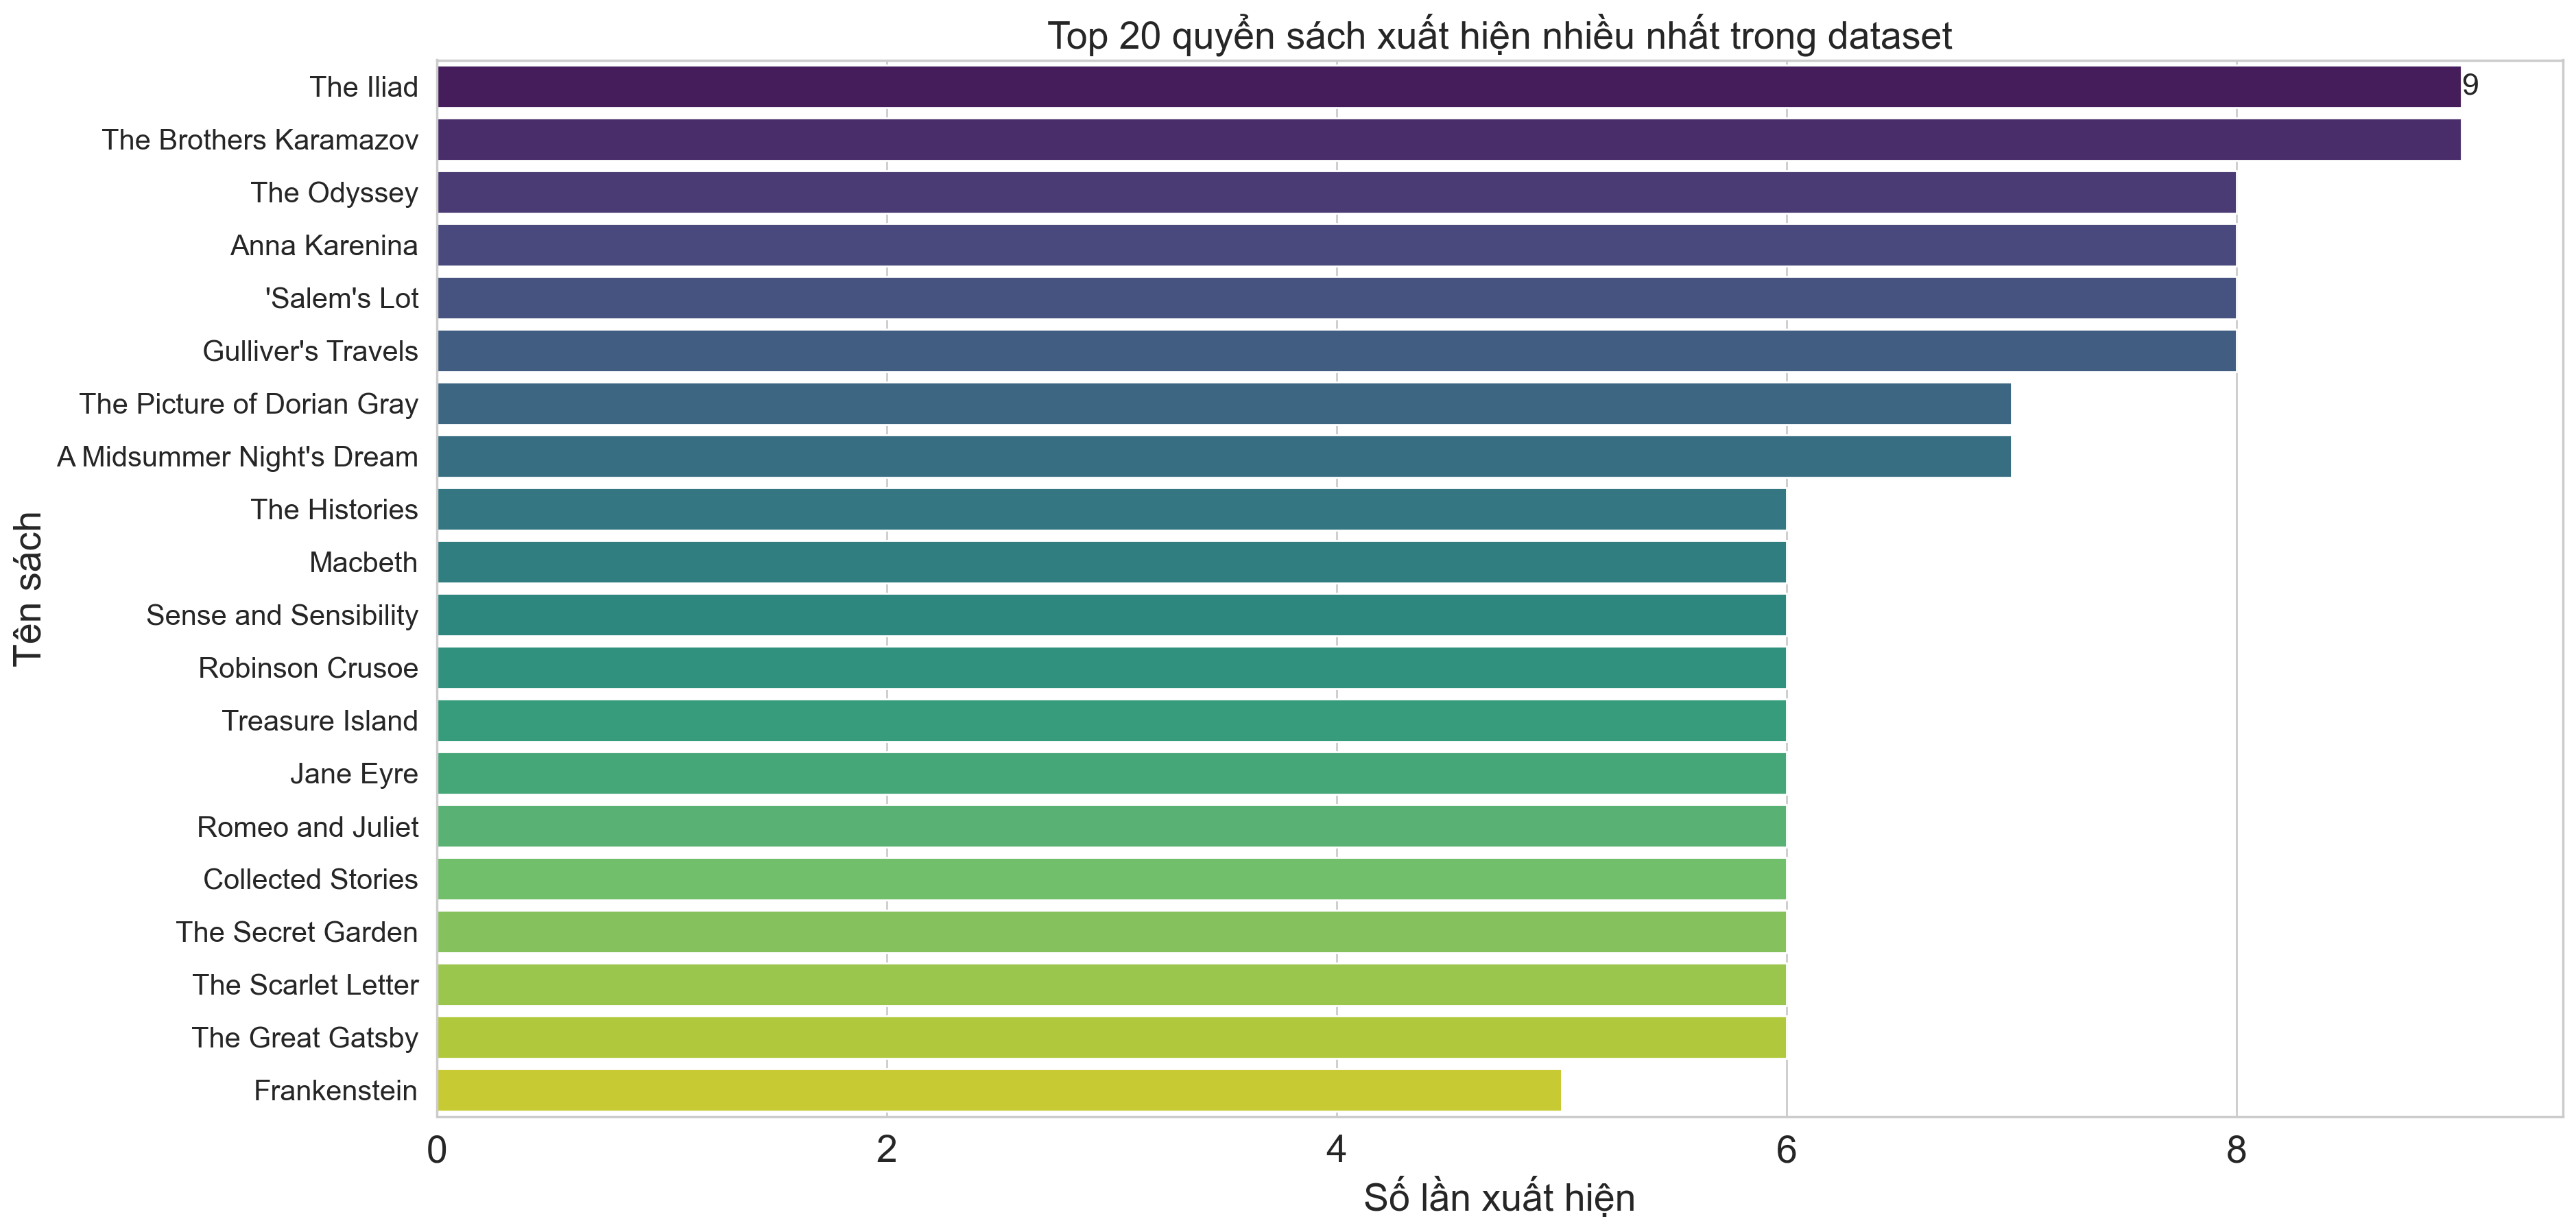

In [9]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_books = raw_df['title'].value_counts()[:20]
ax = sns.barplot(x= Top_20_books, y= Top_20_books.index, palette="viridis")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Tên sách", fontsize=20)
plt.xlabel("Số lần xuất hiện", fontsize=20)
plt.title("Top 20 quyển sách xuất hiện nhiều nhất trong dataset", fontsize= 20)

`Nhận xét`: Một số tiêu đề xuất hiện nhiều lần trong dataset. Điều này không phải do sự lặp lại của các hàng trong dataset mà là do sự khác biệt về tác giả, nhà xuất bản, ngày xuất bản và ngôn ngữ viết của quyển sách.

Ví dụ: Xem xét quyển sách **The Iliad** xuất hiện trong dataset 9 lần.

In [10]:
raw_df[raw_df['title'] == 'The Iliad']

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
403,1371,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,4/29/1999,Penguin Classics
405,1374,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,0374529051,9780374529055,en-US,588,692,81,4/3/2004,Farrar Straus and Giroux
407,1376,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,0140447946,9780140447941,eng,462,1919,118,1/30/2003,Penguin Classics
408,1377,The Iliad,Homer/W.H.D. Rouse,3.86,0451527372,9780451527370,en-US,312,158,15,8/1/1999,Signet Classics
555,1796,The Iliad,Homer/Robert Fitzgerald,3.86,1857150600,9781857150605,eng,594,30,2,3/19/1992,Everyman
3355,12254,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,0143059289,9780143059288,eng,8,42,7,6/15/2006,Penguin-HighBridge
5903,22221,The Iliad,Homer,3.86,0471377589,9780471377580,eng,150,3834,134,10/28/1999,John Wiley & Sons
8534,32780,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,9/1/2011,Collector's Library
8536,32782,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,0753453215,9780753453216,eng,95,8,3,9/15/2000,Kingfisher


#### 2.3.2 Authors

In [11]:
print("Số tác giả xuất hiện trong dataset:", raw_df['authors'].nunique())

Số tác giả xuất hiện trong dataset: 6639


Top 20 tác giả xuất hiện nhiều nhất trong dataset

Text(0.5, 1.0, 'Top 20 tác giả xuất hiện nhiều nhất trong dataset ')

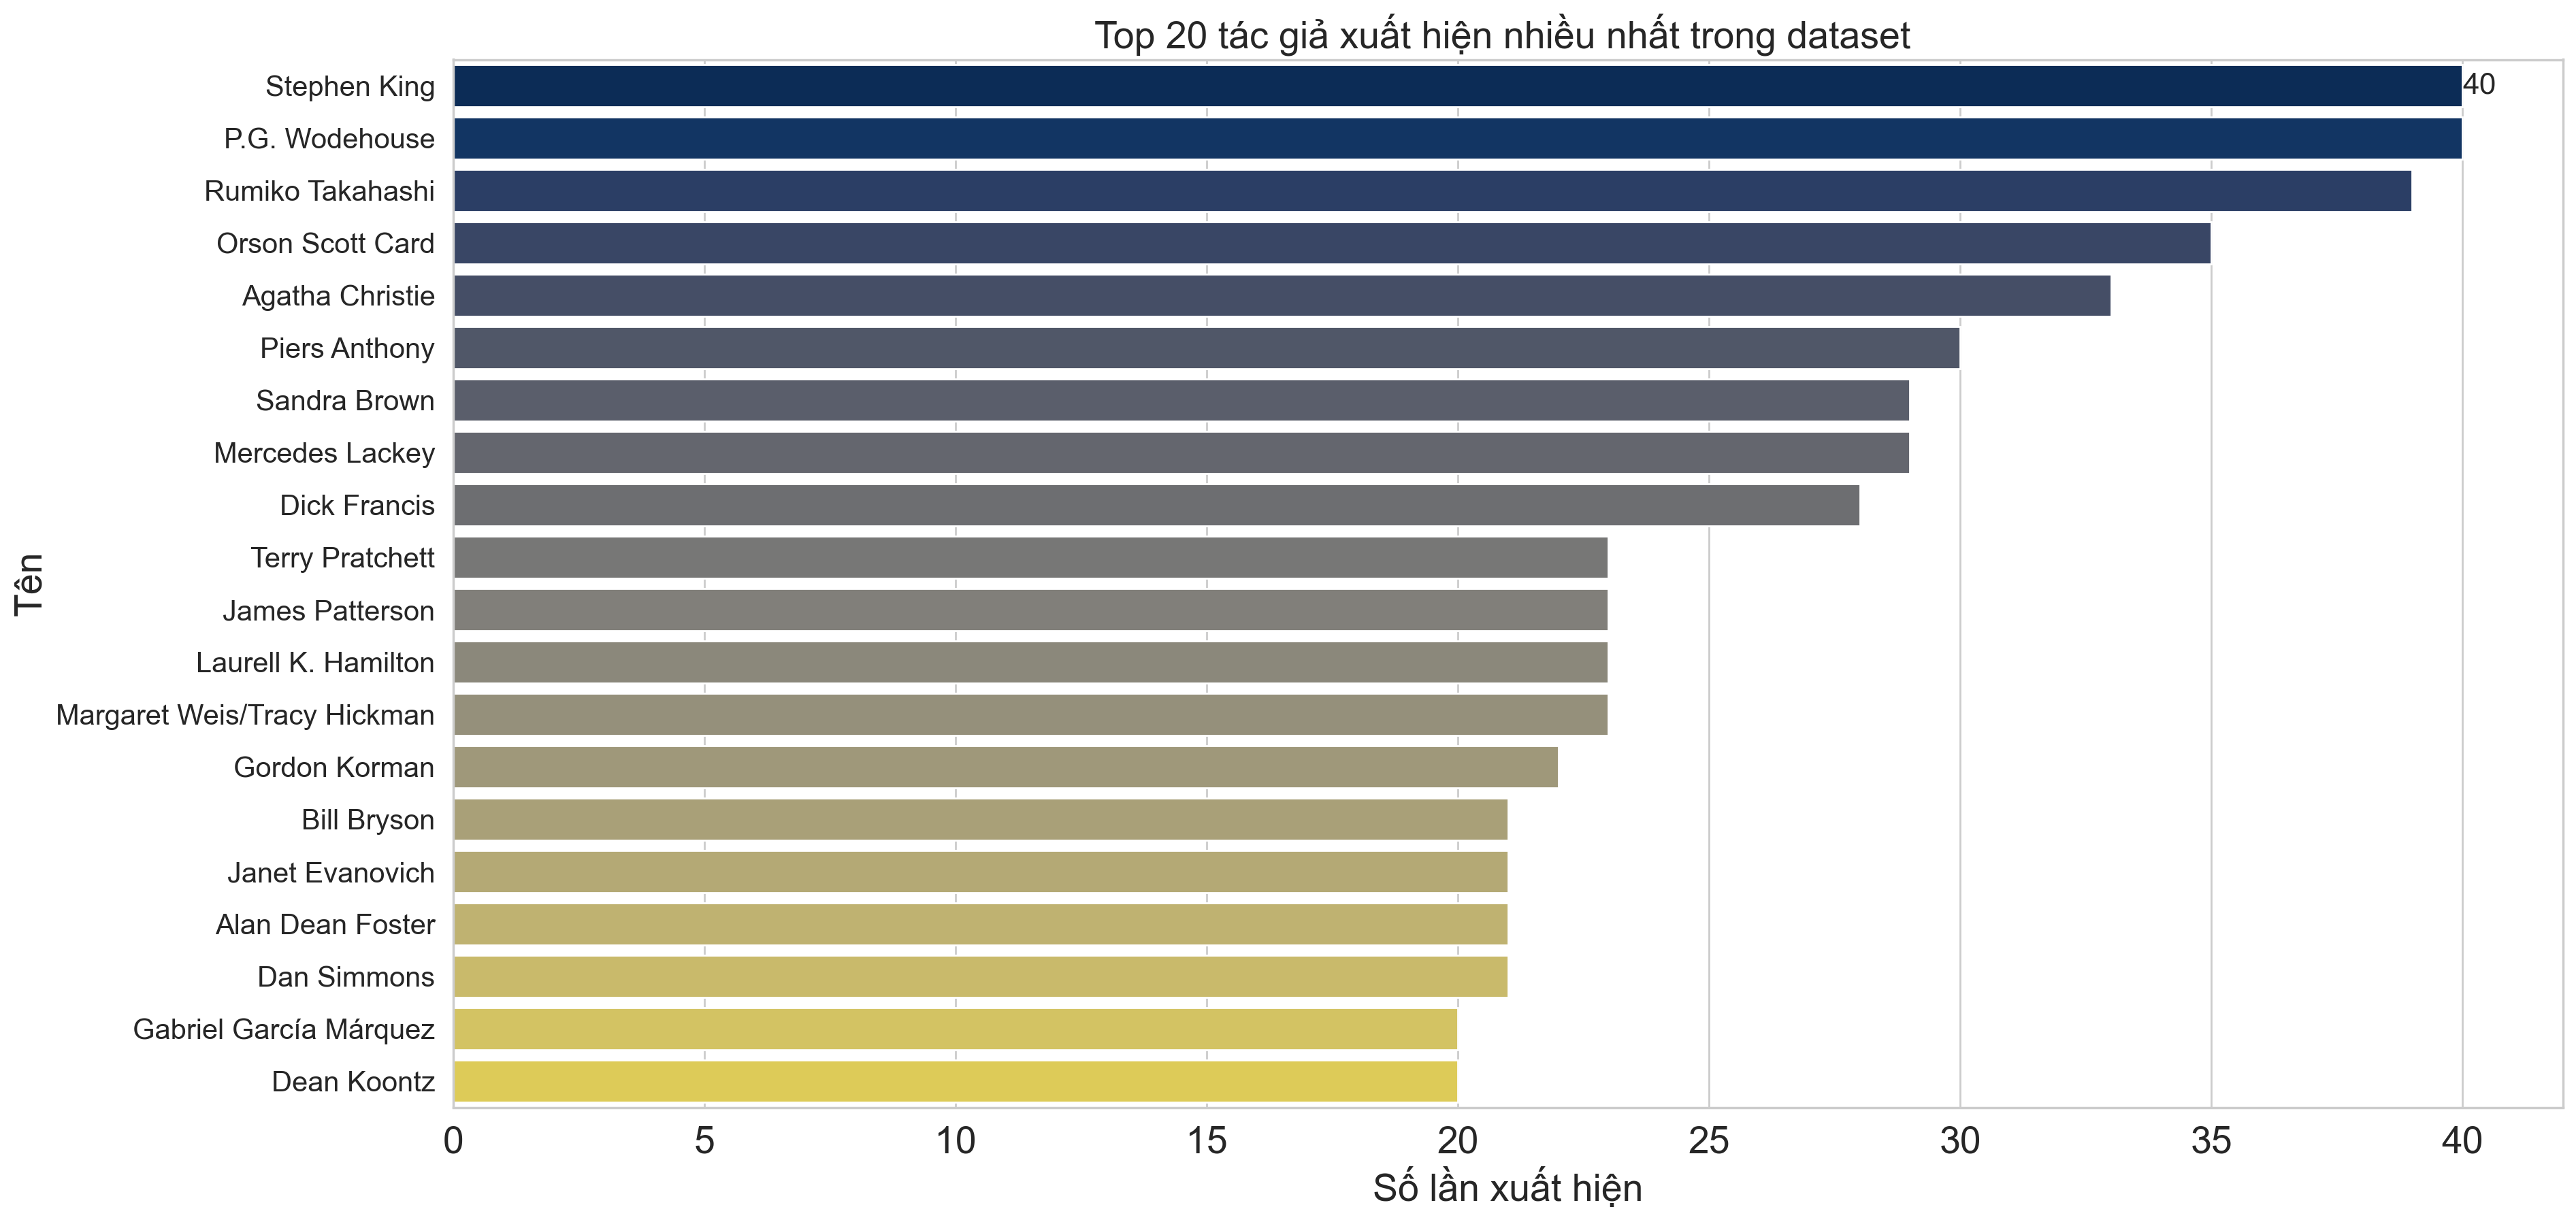

In [12]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_authors = raw_df['authors'].value_counts()[:20]
ax = sns.barplot(x= Top_20_authors, y= Top_20_authors.index, palette="cividis")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Tên", fontsize=20)
plt.xlabel("Số lần xuất hiện", fontsize=20)
plt.title("Top 20 tác giả xuất hiện nhiều nhất trong dataset ", fontsize= 20)

`Nhận xét`: Tác giả Stephen King và P.G. Wodehouse có số lần xuất hiện nhiều nhất với 40 lần. Ngoài ra, trong cột **authors** còn chứa giá trị chỉ báo rằng đây không phải là sách (*NOT A BOOK*). Nhóm em sẽ loại bỏ các giá trị này trong phần tiền xử lý.

In [13]:
raw_df[raw_df['authors'] == 'NOT A BOOK'].head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
5474,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
5475,19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2,0,0,3/30/2005,BBC Physical Audio
5476,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


#### 2.3.3 Publisher

In [14]:
print("Số nhà xuất bản có trong dataset:", raw_df['publisher'].nunique())

Số nhà xuất bản có trong dataset: 2290


Top 20 NXB xuất hiện nhiều nhất trong dataset

Text(0.5, 1.0, 'Top 20 NXB xuất hiện nhiều nhất trong dataset')

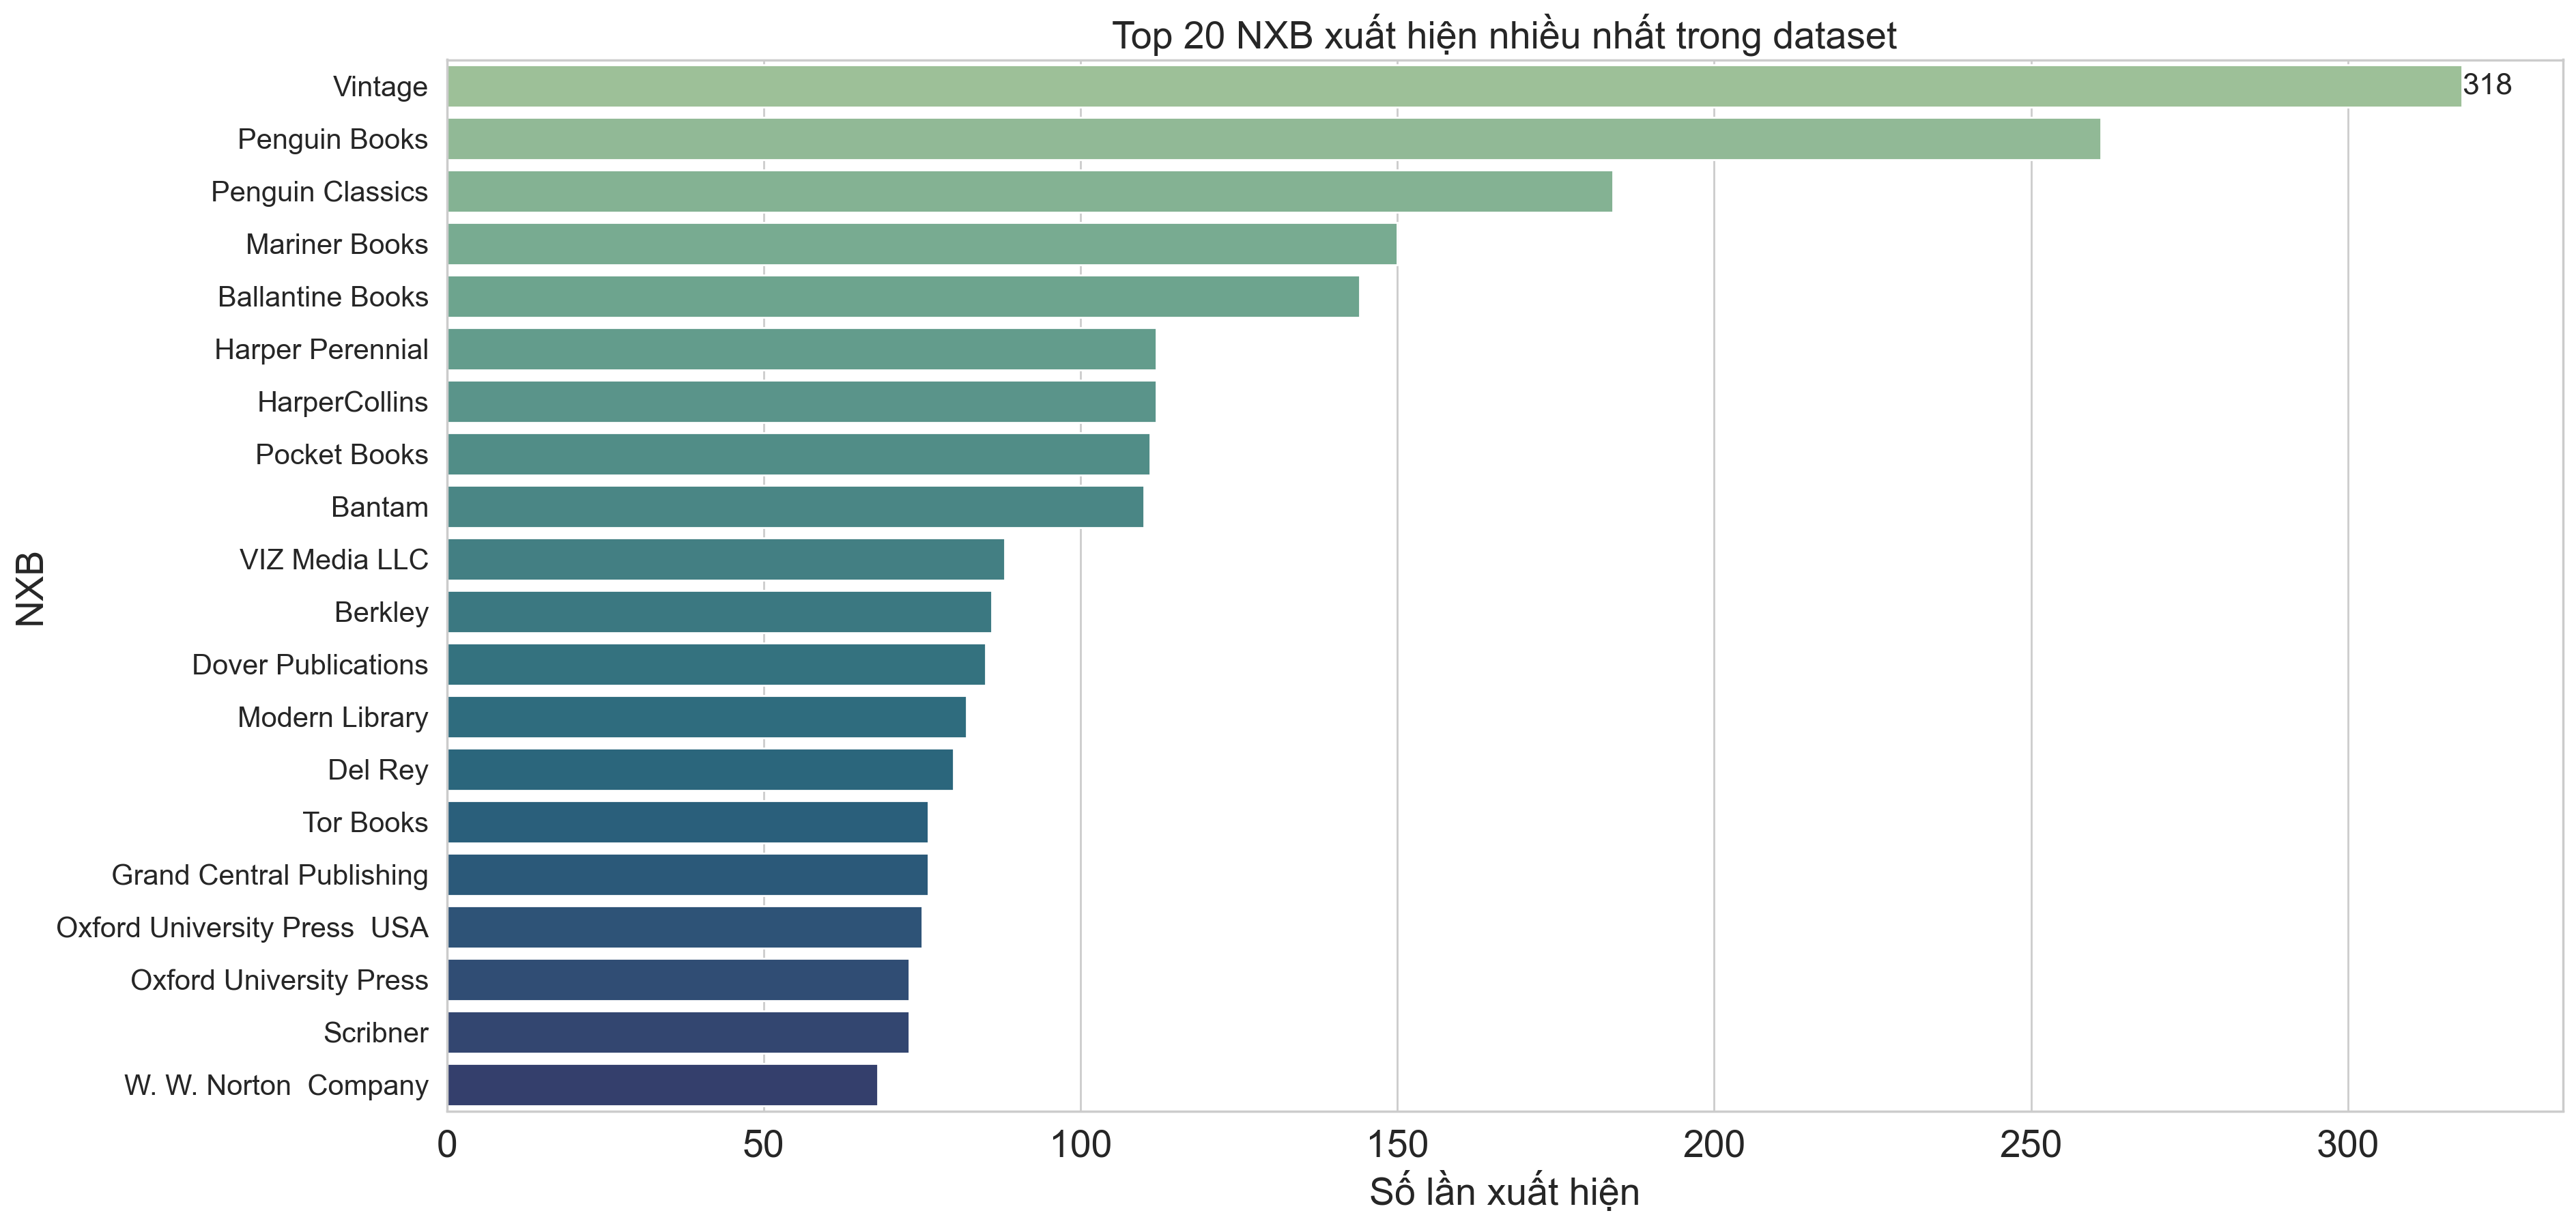

In [15]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_publish = raw_df['publisher'].value_counts()[:20]
ax = sns.barplot(x= Top_20_publish, y= Top_20_publish.index, palette="crest")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("NXB", fontsize=20)
plt.xlabel("Số lần xuất hiện", fontsize=20)
plt.title("Top 20 NXB xuất hiện nhiều nhất trong dataset", fontsize= 20)

`Nhận xét`: Có các NXB nổi tiếng như Vintage xuất hiện nhiều nhất với 318 lần, Penguin Books với hơn 250 lần.

#### 2.3.4 Average rating

Biểu đồ đường mô tả phân phối điểm đánh giá trung bình của các quyển sách

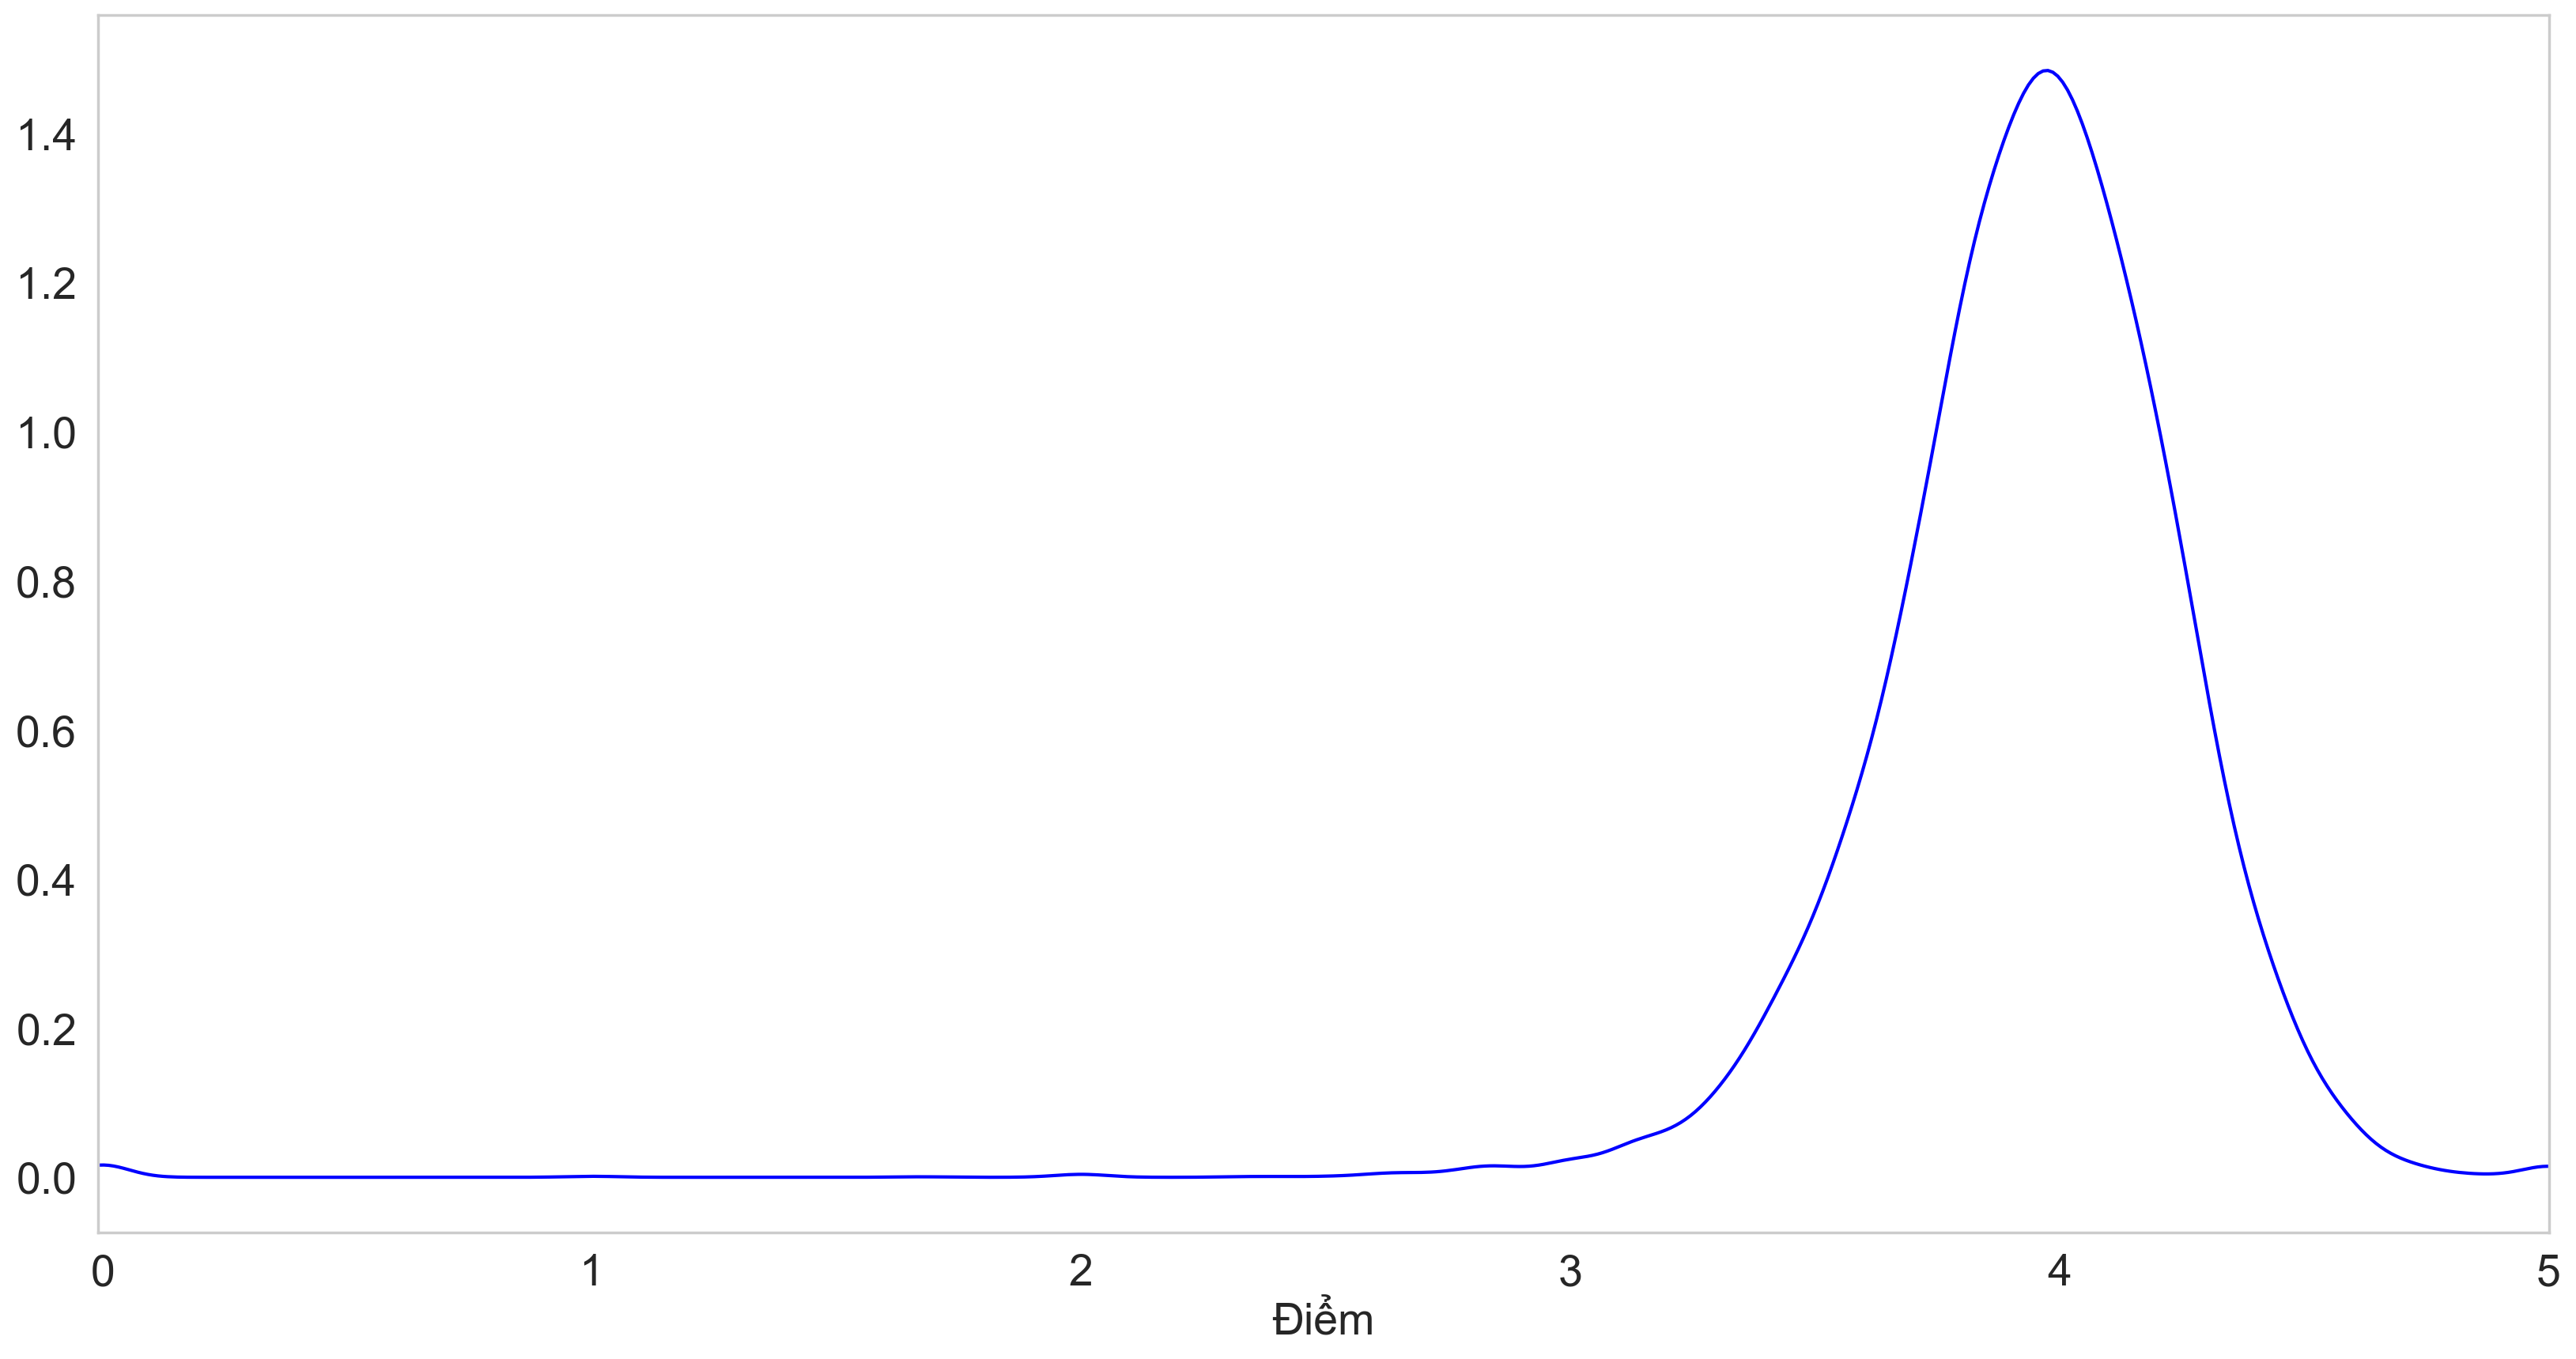

In [16]:
plt.figure(figsize=(20,10),dpi=200)
ax = raw_df['average_rating'].plot(kind='kde',color='blue')
plt.xlabel("Điểm", fontsize=20)
plt.ylabel("")
plt.xlim([-.01, 5])
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.grid()

`Nhận xét`:
- Hầu hết các đánh giá trung bình là từ 3.5 đến 4.5 điểm.
- Có một số ít đánh giá từ 0 đến 3 điểm.

#### 2.3.5 Num pages

In [17]:
print("Số quyển sách có 0 trang:", len(raw_df[raw_df["  num_pages"] == 0]))
print("Số quyển sách có ít hơn 10 trang:", len(raw_df[raw_df["  num_pages"] < 10]))
print("Số quyển sách có ít hơn 50 trang:", len(raw_df[raw_df["  num_pages"] < 50]))
print("Số quyển sách có ít hơn 100 trang:", len(raw_df[raw_df["  num_pages"] < 100]))
print("Số quyển sách có nhiều hơn 1500 trang:", len(raw_df[raw_df["  num_pages"] > 1500]))

Số quyển sách có 0 trang: 76
Số quyển sách có ít hơn 10 trang: 195
Số quyển sách có ít hơn 50 trang: 567
Số quyển sách có ít hơn 100 trang: 1034
Số quyển sách có nhiều hơn 1500 trang: 29


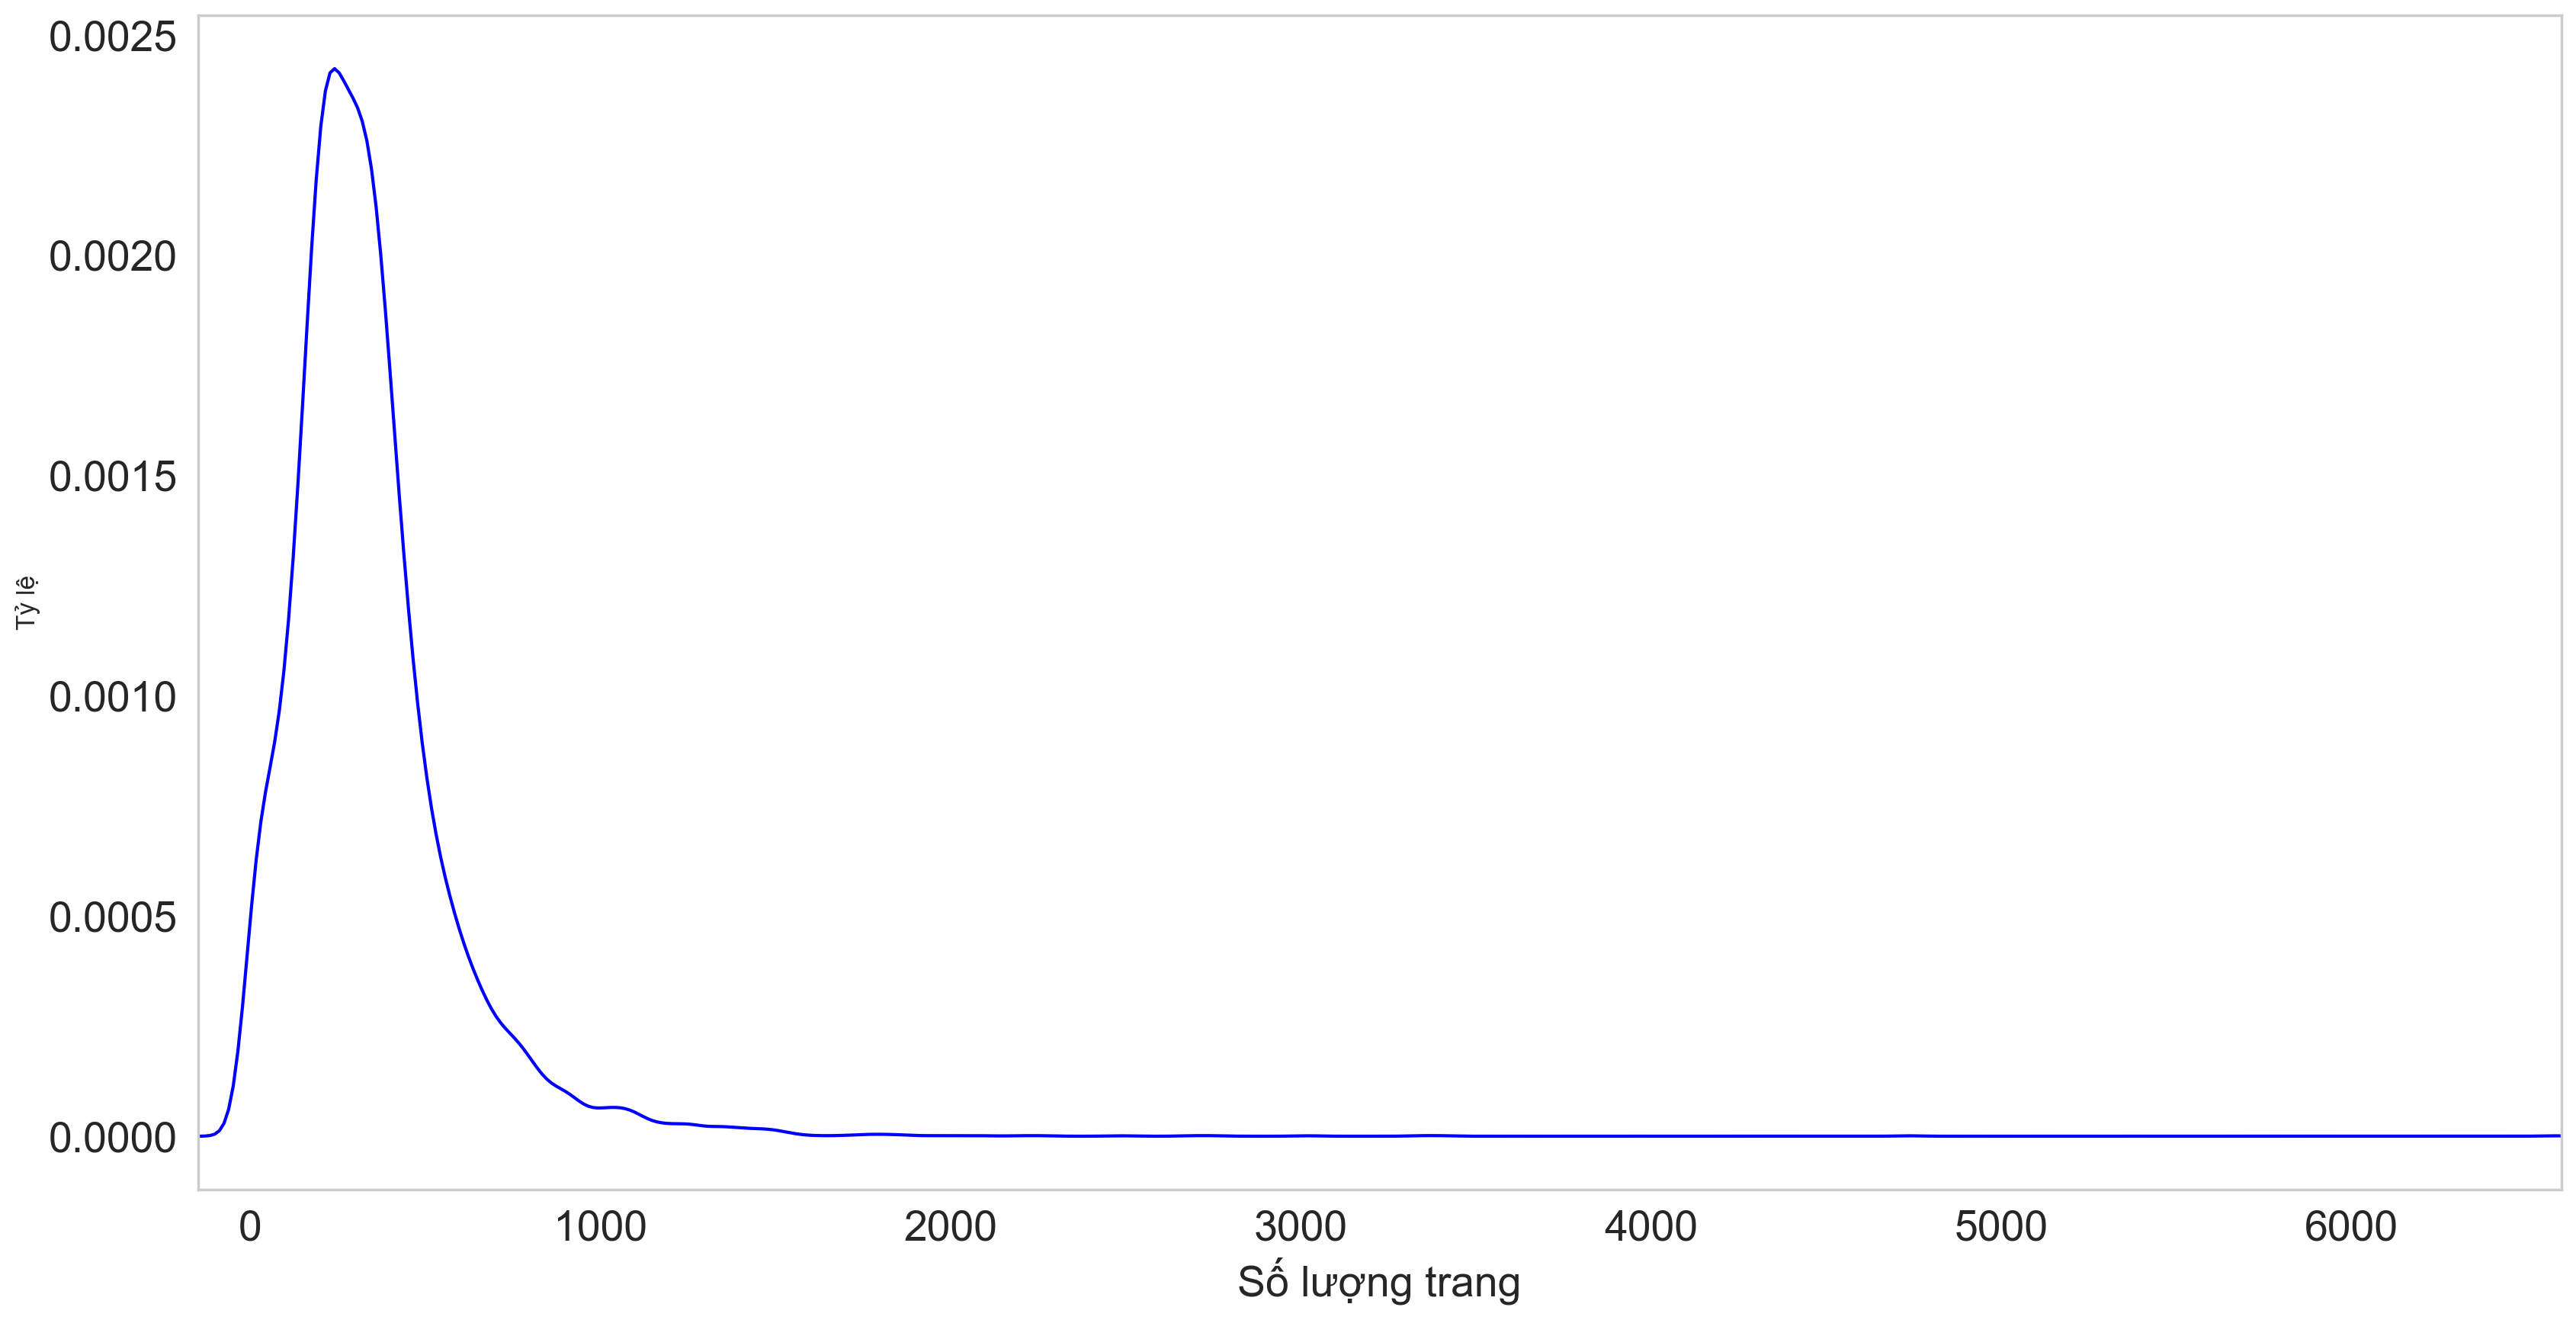

In [18]:
plt.figure(figsize=(20,10),dpi=200)
ax = raw_df["  num_pages"].plot(kind='kde',color='blue')
plt.xlabel("Số lượng trang", fontsize=20)
plt.ylabel("Tỷ lệ")
plt.xlim([-150, 6600])
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.grid()

`Nhận xét`: Có 29 quyển sách dài hơn 1500 trang trong dataset (chúng chủ yếu là tập các quyển sách bán cùng nhau). Nếu không xét đến những quyển sách này, hầu hết các cuốn sách đều có độ dày dưới 1500 trang và chúng có vẻ hợp lý.

#### 2.3.6 Language code

In [19]:
Unique_Lan_Code = pd.unique(raw_df[['language_code']].values.ravel())
print("Number of Unique values: ",raw_df[['language_code']].nunique())
Value_Unique_Lan_Code = raw_df[['language_code']].value_counts()
Value_Unique_Lan_Code.head(10)

Number of Unique values:  language_code    27
dtype: int64


language_code
eng              8908
en-US            1408
spa               218
en-GB             214
fre               144
ger                99
jpn                46
mul                19
zho                14
grc                11
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 Language Code - Count')

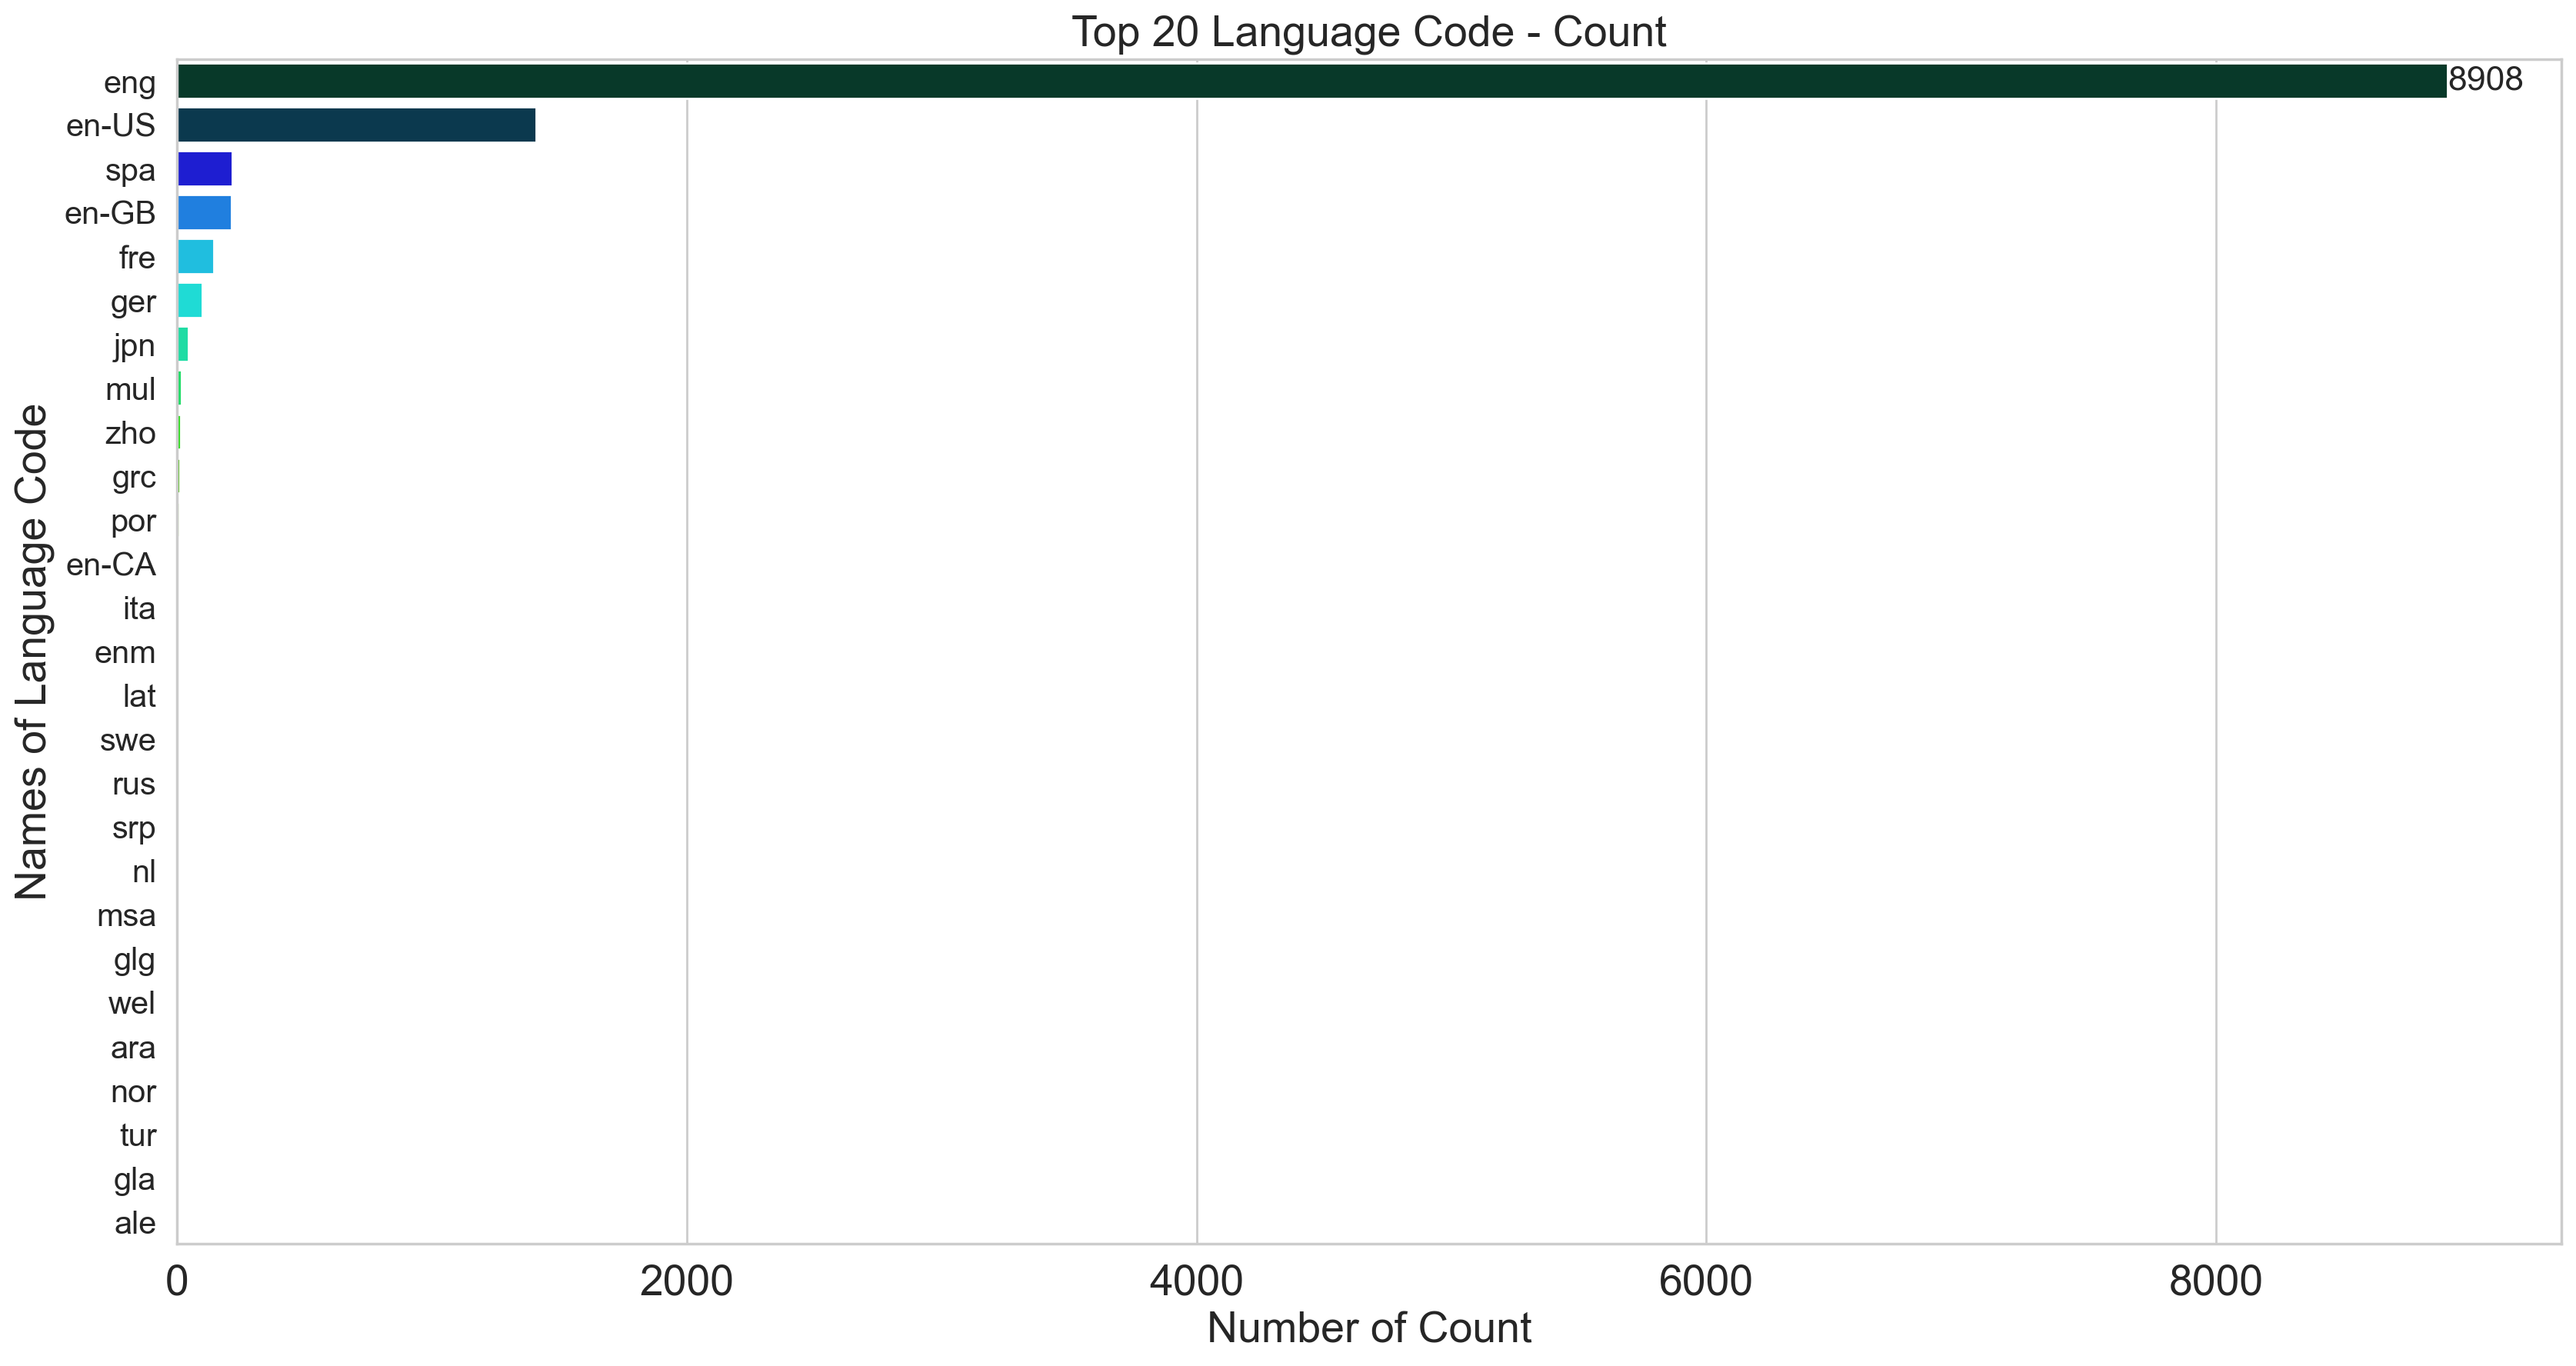

In [20]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_Lan_Code = raw_df['language_code'].value_counts()[:]
ax = sns.barplot(x= Top_20_Lan_Code, y= Top_20_Lan_Code.index, palette="gist_ncar")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Language Code", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Language Code - Count", fontsize= 20)

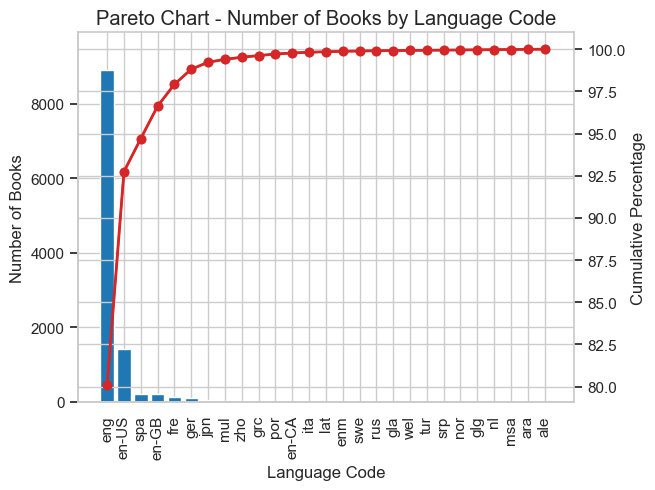

In [21]:
# Group the dataframe by language_code and count the number of books
language_counts = raw_df.groupby('language_code').size().sort_values(ascending=False)

# Calculate the cumulative sum of the book counts
cumulative_counts = language_counts.cumsum()

# Calculate the percentage of the cumulative counts
cumulative_percentage = cumulative_counts / language_counts.sum() * 100

# Create the Pareto chart
fig, ax1 = plt.subplots()

ax1.bar(language_counts.index, language_counts, color='tab:blue')
ax1.set_xlabel('Language Code')
ax1.set_ylabel('Number of Books')
ax1.set_title('Pareto Chart - Number of Books by Language Code')

ax2 = ax1.twinx()
ax2.plot(language_counts.index, cumulative_percentage, color='tab:red', marker='o')
ax2.set_ylabel('Cumulative Percentage')
# Set the style of the plot
plt.style.use('ggplot')

# Customize the appearance of the plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, max(language_counts) + 1000)

# Customize the appearance of the cumulative percentage line
ax2.plot(language_counts.index, cumulative_percentage, color='tab:red', marker='o', linestyle='-', linewidth=2)

# Add labels and title to the plot
ax1.set_xlabel('Language Code')
ax1.set_ylabel('Number of Books')
ax1.set_title('Pareto Chart - Number of Books by Language Code')

ax2.set_ylabel('Cumulative Percentage')

# Show the plot
plt.show()

In [22]:
eng = ['eng', 'en-US', 'en-GB', 'en-CA', 'enm']

eng_percent = (Value_Unique_Lan_Code[eng] / row) * 100
print("Các quyển sách được viết bằng tiếng Anh chiếm " + str(round(sum(eng_percent),2)) + "% với số lượng là " + str(sum(Value_Unique_Lan_Code[eng])) + " quyển sách")

Các quyển sách được viết bằng tiếng Anh chiếm 94.76% với số lượng là 10540 quyển sách


`Nhận xét`: 
- Có 10540 quyển sách thuộc nhóm ngôn ngữ tiếng Anh (eng, en-US, en-GB, en-CA, enm) chiếm khoảng 95% tổng số sách.
- Đa số sinh viên chỉ muốn hoặc chỉ có thể đọc các quyển sách được viết bằng tiếng Anh.
- Việc xử lý text (tách từ, loại bỏ stopword,...) đối với các ngôn ngữ là khác nhau do đó sẽ khiến bài toán phức tạp hơn rất nhiều.

&rArr; `Kết luận`: Chỉ giữ lại các quyển sách thuộc nhóm ngôn ngữ tiếng Anh để xây dựng hệ thống gợi ý sách tiếng Anh.

#### 2.3.7 ratings_count và text_reviews_count

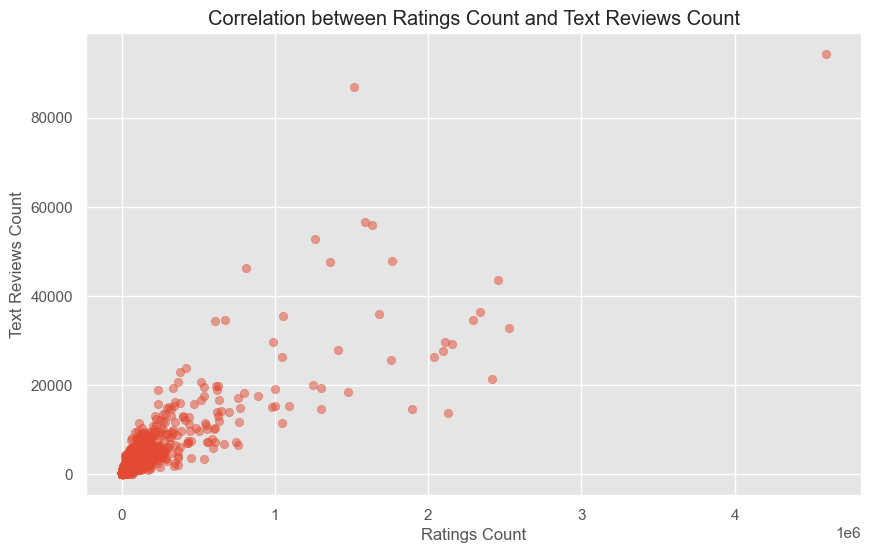

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(raw_df['ratings_count'], raw_df['text_reviews_count'], alpha=0.5)
plt.xlabel('Ratings Count')
plt.ylabel('Text Reviews Count')
plt.title('Correlation between Ratings Count and Text Reviews Count')
plt.show()

In [24]:
correlation = raw_df['ratings_count'].corr(raw_df['text_reviews_count'])
print("Hệ số tương quan giữa ratings_count và text_reviews_count:", round(correlation, 2))

Hệ số tương quan giữa ratings_count và text_reviews_count: 0.87


`Nhận xét`: Nhìn vào biểu đồ và hệ số tương quan giữa hai cột có thể thấy càng nhiều lượt rating thì càng có nhiều text reviews và điều này là hợp lý.

### 2.4 Tiền xử lý dữ liệu

In [25]:
process_df = raw_df.copy()

Đầu tiên, xóa các khoảng trống trong cột `num_pages`

In [26]:
process_df = process_df.rename(columns={'  num_pages': 'num_pages'})

`Đánh giá`:
- **bookID**: chỉ để xác định duy nhất mỗi quyển sách, không chứa thông tin có ích trong quá trình xây dựng hệ thống gợi ý.
- **isbn**: chứa các thông tin đã có ở các cột khác như là thông tin nhà xuất bản, khu vực ngôn ngữ,...
- **isbn13**: tương tự như cột isbn.

&rArr;  `Kết luận`: Xóa các cột được nêu trên.

In [27]:
# Xóa các cột không sử dụng, không chứa thông tin
columns_to_drop = ['bookID', 'isbn', 'isbn13']
process_df = process_df.drop(columns=columns_to_drop)

In [28]:
# Xóa các ngôn ngữ không thuộc nhóm ngôn ngữ tiếng Anh
eng = ['eng', 'en-US', 'en-GB', 'en-CA', 'enm']
process_df = process_df[process_df['language_code'].isin(eng)]
print("Số hàng sau khi xóa:", process_df.shape[0])

Số hàng sau khi xóa: 10540


Do chỉ giữ lại các quyển sách tiếng Anh nên có thể bỏ cột `language_code`

In [29]:
process_df = process_df.drop(columns='language_code')

Xóa các dòng mà tác giả là `NOT A BOOK` chứng tỏ đây không phải là sách

In [30]:
# Xóa các dòng mà tác giả là "NOT A BOOK"
process_df = process_df[process_df['authors'] != 'NOT A BOOK']
print("Số hàng sau khi xóa:", process_df.shape[0])

Số hàng sau khi xóa: 10535


Tạo ra đặc trưng mới từ cột `publication_date` là `book_age` chỉ số tuổi của sách kể từ thời điểm xuất bản tính đến hiện tại.

In [31]:
# Chuyển đổi cột 'publication_date' từ chuỗi ký tự sang định dạng ngày tháng của Pandas
process_df['publication_date'] = pd.to_datetime(process_df['publication_date'], errors='coerce')

# Tạo đặc trưng "book_age" từ cột publication_date
process_df['book_age'] = (pd.Timestamp('now') - pd.to_datetime(process_df['publication_date'], errors='coerce')).dt.days / 365

# Xóa cột publication_date
process_df = process_df.drop(columns=['publication_date'])

In [32]:
# Kiểm tra xem có dữ liệu bị trống không
process_df.isna().sum()

title                 0
authors               0
average_rating        0
num_pages             0
ratings_count         0
text_reviews_count    0
publisher             0
book_age              1
dtype: int64

Dữ liệu sau khi được xử lý xuất hiện giá trị bị trống trong cột `book_age` do khi chuyển sang dữ liệu kiểu datetime thì bị sai định dạng, nhóm em sẽ xóa đi hàng chứa giá trị bị trống này 

In [33]:
# Xóa các dòng có giá trị trống
process_df = process_df.dropna()
print("Số hàng sau khi xóa:", process_df.shape[0])

Số hàng sau khi xóa: 10534


Do khi người dùng tìm kiếm một quyển sách, họ sẽ chỉ quan tâm đến tác giả chính của quyển sách đó nên nhóm em sẽ chỉ giữ lại tác giả chính của quyển sách

In [34]:
# Chỉ giữ lại tác giả chính
process_df['main_author'] = process_df['authors'].apply(lambda x: x.split('/')[0])

# Xóa cột authors
process_df = process_df.drop(columns=['authors'])

Đa số các quyển sách có số lượng trang ít là do chúng là audio book, video hoặc do thông tin về số trang bị sai. Cho nên nhóm em sẽ lọc bỏ các quyển sách có số trang nhỏ hơn 10 và số trang lớn hơn 1500 (như đã nói ở phần trước)

In [36]:
# Xóa các quyển sách có số trang nhỏ hơn 10 và lớn hơn 1500
process_df = process_df[(process_df['num_pages'] >= 10) & (process_df['num_pages'] <= 1500)]

# Số lượng sách sau khi xóa
print("Số hàng còn lại sau khi xóa:", process_df.shape[0])

Số hàng còn lại sau khi xóa: 10318


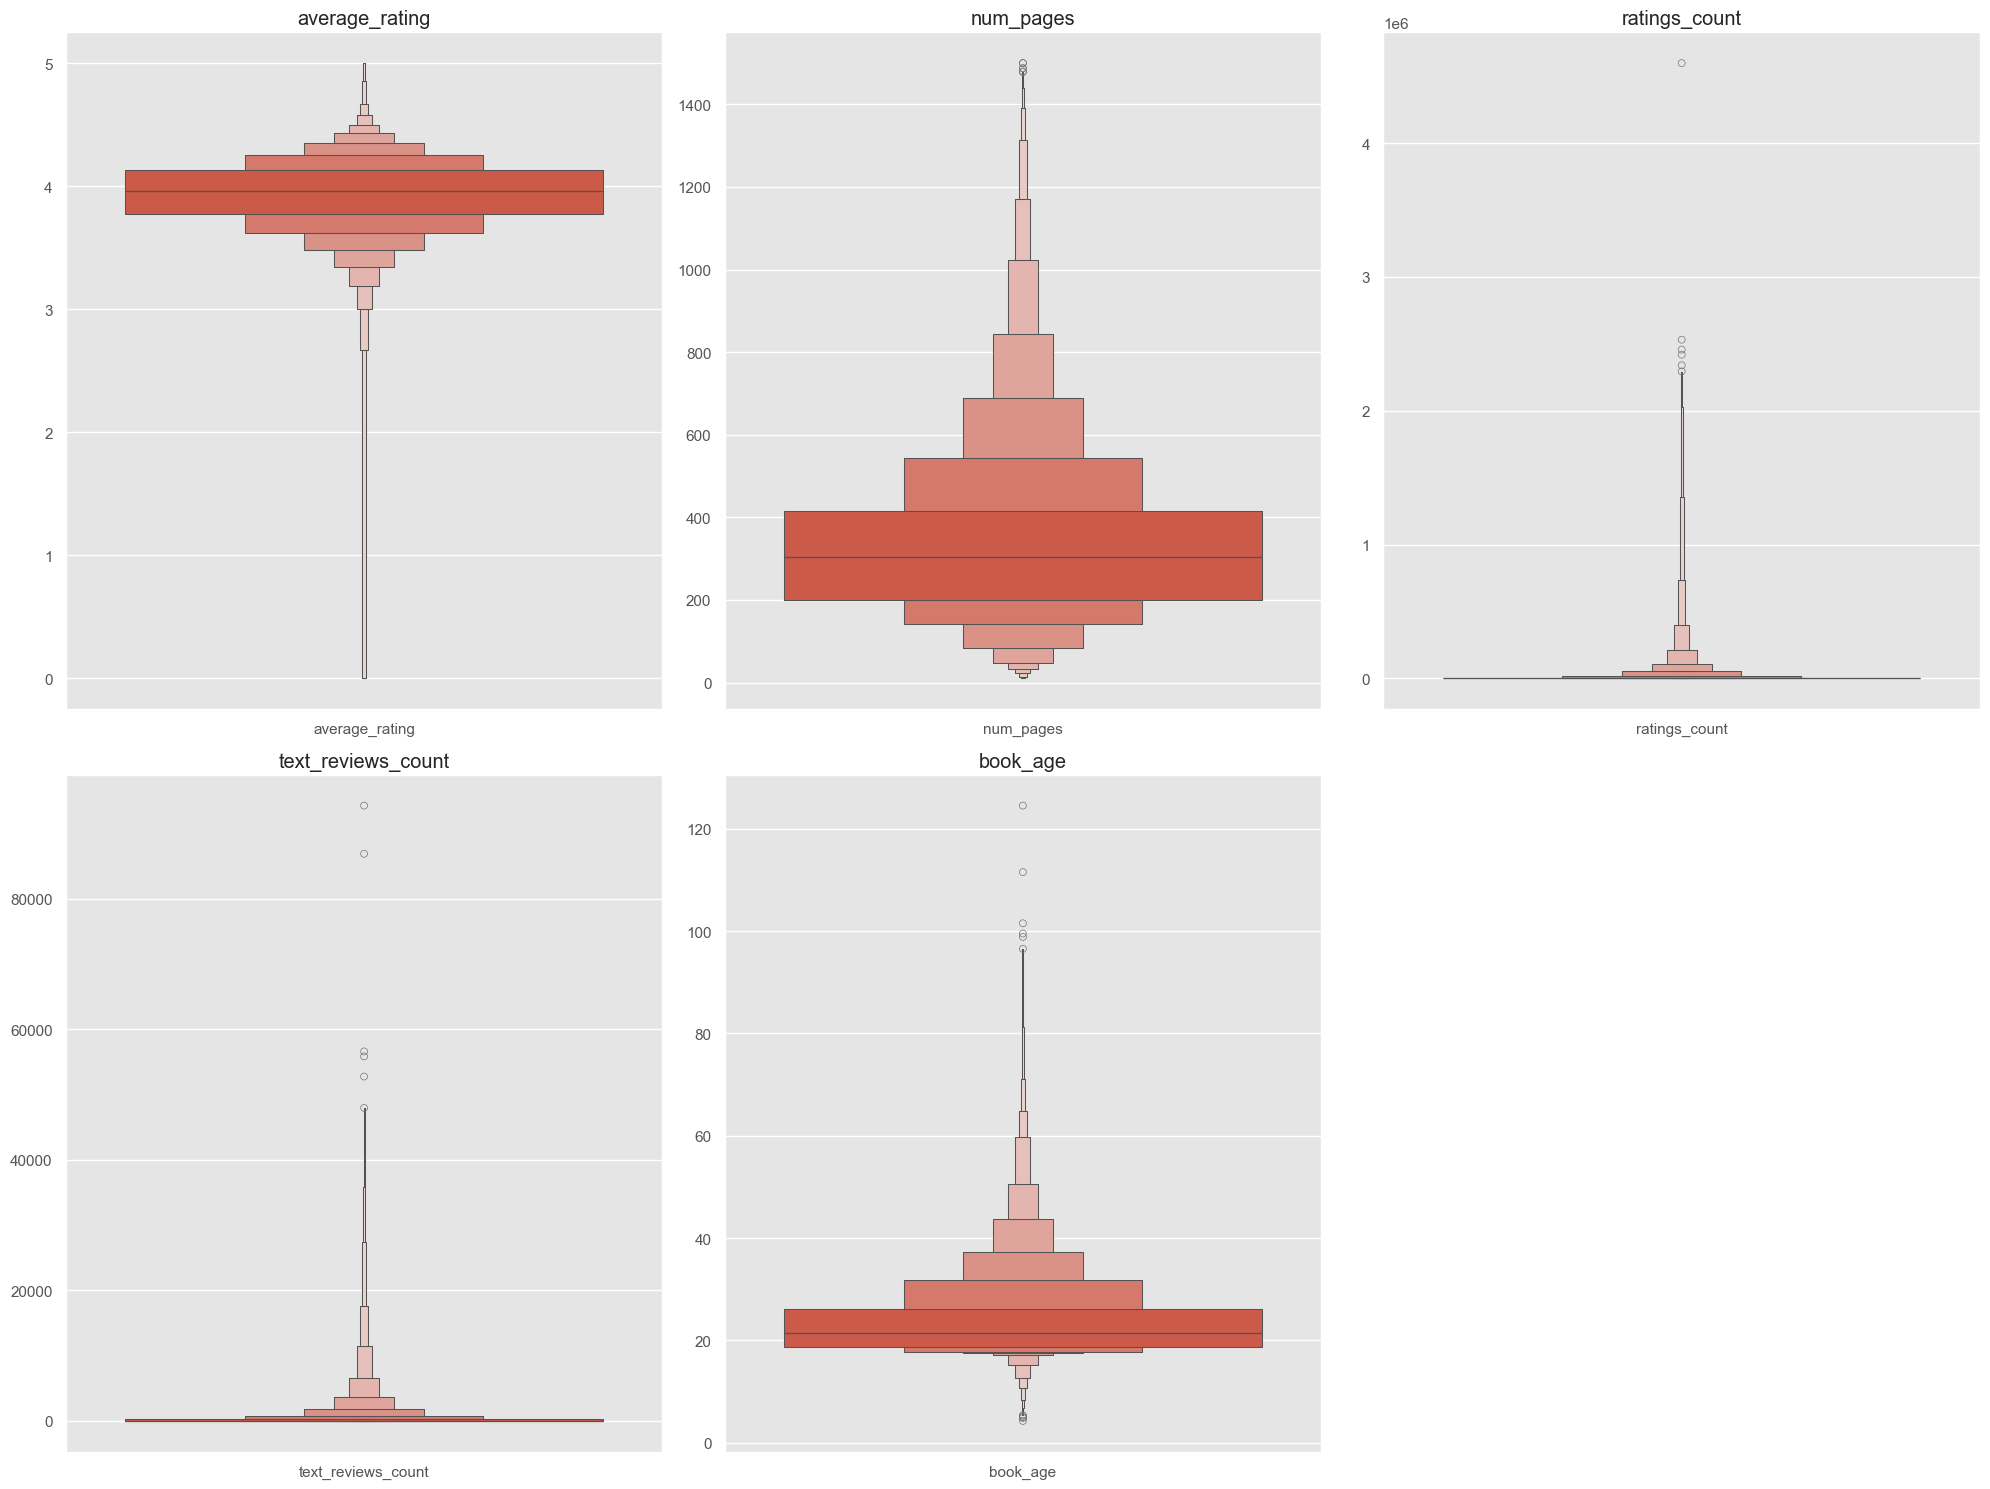

In [37]:
numerical_features = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'book_age']

# Vẽ biểu đồ boxen plot cho từng feature
plt.figure(figsize=(20, 15))  # Tăng chiều rộng và chiều cao để chứa tất cả các biểu đồ
num_cols = 3  # Số biểu đồ trên mỗi dòng
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Tính toán số hàng cần thiết

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxenplot(data=process_df[[feature]])
    plt.title(feature)
    plt.tight_layout()  # Đảm bảo rằng các biểu đồ không bị chồng lên nhau

`Nhận xét`: Nhìn vào biểu đồ ở trên, có thể thấy các đặc trưng có miền giá trị rất khác nhau. Trong phần 3 nhóm em sẽ tiến hành chuẩn hóa các đặc trưng số đó.

Tạo ra các đặc trưng từ các cột văn bản sử dụng các kỹ thuật xử lý ngôn ngữ tự nhiên (NLP)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import scipy.sparse as sp

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Tải các tài nguyên cần thiết cho nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Khởi tạo bộ lemmatizer và danh sách các từ dừng
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
  # Chuyển văn bản thành chữ thường
  text = text.lower()
  
  # Loại bỏ các ký tự đặc biệt và số
  text = re.sub(r'\W+', ' ', text)
  
  # Tokenization và lemmatization
  tokens = text.split()
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
  
  # Kết hợp lại các token thành chuỗi
  return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vuhuu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vuhuu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
model_df = process_df.copy()

In [40]:
# Áp dụng tiền xử lý cho các cột văn bản
model_df['title'] = model_df['title'].apply(preprocess_text)
model_df['main_author'] = model_df['main_author'].apply(preprocess_text)
model_df['publisher'] = model_df['publisher'].apply(preprocess_text)

# Kết hợp các cột đã xử lý thành một cột duy nhất
model_df['combined_features'] = model_df['title'] + ' ' + model_df['main_author'] + ' ' + model_df['publisher']

# Kiểm tra lại số hàng sau khi xử lý
print("Số hàng sau khi xử lý văn bản:", process_df.shape[0])

# Tạo dataframe chỉ chứa các cột văn bản
model_df = model_df[['combined_features']]

# Khởi tạo TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Tạo ma trận TF-IDF cho model_df
tfidf_matrix = tfidf_vectorizer.fit_transform(model_df['combined_features'])
print("Kích thước ma trận TF-IDF:", tfidf_matrix.shape)

Số hàng sau khi xử lý văn bản: 10318
Kích thước ma trận TF-IDF: (10318, 13053)


## `3. Tạo, luyện và đánh giá mô hình`

### 3.1 Tạo mô hình (mô tả các quyết định)

**Mô tả quyết định:**
- `metric='cosine'`: Tham số này xác định phương pháp đo lường khoảng cách giữa các điểm dữ liệu trong không gian đa chiều, tham số này chỉ định rằng khoảng cách giữa các điểm sẽ được tính bằng độ đo cosine giữa chúng. Khoảng cách cosine thường được sử dụng trong các không gian đa chiều để đo mức độ tương đồng giữa các véc-tơ. Nó phù hợp đặc biệt với dữ liệu văn bản, nơi mỗi văn bản được biểu diễn bởi một véc-tơ các từ.
- `algorithm='brute'`: Tham số này xác định thuật toán sẽ được sử dụng để tìm kiếm hàng xóm gần nhất, tham số này chỉ định rằng thuật toán tìm kiếm "lực brute" (brute force) sẽ được sử dụng. Điều này có nghĩa là mô hình sẽ kiểm tra từng điểm dữ liệu để tìm các điểm gần nhất. Đối với các bài toán với số lượng điểm dữ liệu nhỏ đến vừa, brute force là một lựa chọn hợp lý và đơn giản do đó sẽ phù hợp với bài toán.

In [41]:
# Khởi tạo mô hình Nearest Neighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')

# Huấn luyện mô hình
knn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Hàm `get_book_recommendations_combined` được sử dụng để đề xuất các cuốn sách dựa trên một truy vấn tìm kiếm và các yếu tố khác như đánh giá trung bình, số trang, số lượt đánh giá, số lượt đánh giá văn bản, và tuổi của sách.

1. Tính toán điểm số (score):

- Đầu tiên, các yếu tố như rating_score, pages_score, ratings_count_score, text_reviews_score, và book_age_score được chuẩn hóa **Min-Max** để chúng có cùng phạm vi giá trị (từ 0 đến 1). Điều này giúp đánh giá các yếu tố này trên cùng một thang điểm, dễ dàng so sánh và kết hợp chúng lại với nhau.
- Sau đó, khoảng cách (distance) từ kết quả tìm kiếm Nearest Neighbors (sử dụng cosine similarity) được sử dụng như một yếu tố trong tính toán tổng thể score.
- Cuối cùng, các giá trị chuẩn hóa của các đặc trưng và distance được cộng lại để tạo ra một score tổng thể. Điều này cho phép đánh giá tổng thể về mức độ phù hợp của các cuốn sách với truy vấn tìm kiếm và các tiêu chí khác.

2. Ý nghĩa của score: Do không có dữ liệu về người dùng, chúng ta chỉ có thể đánh giá sự phù hợp của quyển sách dựa trên độ nổi tiếng của nó. Nếu score càng cao thì quyển sách càng nổi tiếng, được yêu thích nhiều và ngược lại.

In [52]:
def get_book_recommendations(search_query, n_recommendations=10):
    # Chuyển đổi truy vấn thành vector TF-IDF
    query_vec_tfidf = tfidf_vectorizer.transform([preprocess_text(search_query)])
    # Tìm kiếm các sách tương tự
    distances, indices = knn.kneighbors(query_vec_tfidf, n_neighbors=n_recommendations)
    
    # Lưu distances và indices vào DataFrame
    results = process_df.iloc[indices.flatten()].copy()
    results['distance'] = distances.flatten()
    
    # Tính toán điểm xếp hạng dựa trên các cột khác
    results['rating_score'] = results['average_rating']
    results['ratings_count_score'] = results['ratings_count']
    results['text_reviews_score'] = results['text_reviews_count']
    results['book_age_score'] = results['book_age']
    
    for column in ['ratings_count_score', 'text_reviews_score']:
        results[column] = (results[column] - results[column].mean()) / results[column].std()
    
    # Chuẩn hóa điểm số để chúng nằm trong khoảng từ 0 đến 1
    for column in ['rating_score', 'ratings_count_score', 'text_reviews_score', 'book_age_score']:
        results[column] = (results[column] - results[column].min()) / (results[column].max() - results[column].min())
    
    # Tính tổng score
    results['score'] = results['rating_score'] + results['ratings_count_score'] + results['text_reviews_score'] + results['book_age_score'] + results['distance']
    
    # Tạo cột kết quả
    results['result'] = results['title'] + ' by ' + results['main_author'] + ' (Publisher: ' + results['publisher'] + ')'
    
    # Sắp xếp theo thứ tự giảm dần của A và lấy danh sách các sách được gợi ý
    recommendations = results.sort_values(by='score', ascending=False)['result'].tolist()
    
    return recommendations

get_book_recommendations("Rowling", n_recommendations=10) 
# Số lượng sách được gợi ý có thể thay đổi tùy ý bằng cách thay đổi tham số n_recommendations

['Harry Potter and the Prisoner of Azkaban (Harry Potter  #3) by J.K. Rowling (Publisher: Scholastic Inc.)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5) by J.K. Rowling (Publisher: Scholastic Inc.)',
 'Harry Potter and the Half-Blood Prince (Harry Potter  #6) by J.K. Rowling (Publisher: Scholastic Inc.)',
 'Harry Potter and the Goblet of Fire (Harry Potter  #4) by J.K. Rowling (Publisher: Bloomsbury)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2) by J.K. Rowling (Publisher: Scholastic)',
 'Harry Potter and the Half-Blood Prince (Harry Potter  #6) by J.K. Rowling (Publisher: Bloomsbury Publishing)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3) by J.K. Rowling (Publisher: Bloomsbury UK)',
 "J.K. Rowling's Harry Potter Novels: A Reader's Guide by Philip Nel (Publisher: Bloomsbury Academic)",
 "J.K. Rowling - A Biography by Sean Smith (Publisher: Michael O'Mara Books)",
 'J.K.Rowling by Colleen Sexton (Publisher: Lerner Publications)']

### 3.2 Mô tả quá trình luyện mô hình hay chạy giải thuật

**1. Tiền xử lý dữ liệu**
- Xử lý dữ liệu đầu vào: Dữ liệu từ file CSV books.csv được đọc vào DataFrame. Sau đó, dữ liệu được kiểm tra và làm sạch để loại bỏ các giá trị bị thiếu, các giá trị không hợp lệ, và các cột không cần thiết.

- Chuẩn bị dữ liệu: Dữ liệu sau khi được load và tiền xử lý bao gồm các bước như đổi tên cột, loại bỏ các dòng có giá trị bị trống, và chuyển đổi các dữ liệu dạng chuỗi thành dạng ngày tháng.

**2. Feature Engineering**
- Trích xuất đặc trưng: Từ dữ liệu ban đầu, một số đặc trưng mới được tạo ra như `book_age` để biểu diễn tuổi của quyển sách tính bằng số năm kể từ ngày xuất bản.

- Xử lý văn bản: Các cột văn bản như title, main_author, và publisher được tiền xử lý bằng cách loại bỏ stop words, chuyển thành chữ thường, và lemmatization để chuẩn hóa dữ liệu.

**3. Vectorization**
- TF-IDF Vectorization: Các cột văn bản đã được tiền xử lý được biểu diễn dưới dạng ma trận TF-IDF (Term Frequency-Inverse Document Frequency). Quá trình này biến đổi các đặc trưng văn bản thành các vector số học để có thể sử dụng cho mô hình học máy.

**4. Mô hình hóa**
- Khởi tạo và huấn luyện mô hình: Mô hình được sử dụng là Nearest Neighbors (kNN), một thuật toán học máy không giám sát để tìm các điểm gần nhất dựa trên độ tương đồng cosine giữa các vector TF-IDF.

- Chạy giải thuật: Khi một câu truy vấn sách mới được cung cấp, nó sẽ được tiền xử lý bằng cùng quy trình tiền xử lý văn bản và chuyển đổi thành vector TF-IDF. Sau đó, thuật toán Nearest Neighbors sẽ tìm kiếm và trả về các sách tương tự nhất dựa trên khoảng cách cosine giữa vector truy vấn và các vector của các cuốn sách trong tập dữ liệu huấn luyện.

### 3.3 Mô tả điều kiện dừng

Trong mô hình gợi ý sách sử dụng thuật toán Nearest Neighbors không giám sát và TF-IDF vectorization, không có điều kiện dừng cụ thể như trong các thuật toán huấn luyện có giám sát (ví dụ như khi hàm mất mát hội tụ đến một ngưỡng nhất định hoặc số lượng lần lặp tối đa). Do đó, trong bài toán này, từ đầu vào của người dùng chúng ta sẽ lấy `n` hàng xóm gần nhất (với n là tham số của hàm `get_book_recommendations`) để trả về kết quả gợi ý và giải thuật sẽ kết thúc.

### 3.4 Đánh giá quá trình luyện hay chạy giải thuật, hiệu chỉnh siêu tham số

`Ưu điểm`

- **Tiền xử lý dữ liệu toàn diện**: Dữ liệu thô đã trải qua một loạt các bước tiền xử lý để chuẩn bị cho việc huấn luyện mô hình. Các bước này bao gồm loại bỏ dữ liệu trùng lặp, xử lý giá trị bị trống, chuyển đổi và chuẩn hóa các đặc trưng văn bản như tiêu đề sách, tác giả và nhà xuất bản. Điều này giúp cải thiện tính chính xác và khả năng tổng quát hóa của mô hình.

- **Sử dụng TF-IDF Vectorization**: Sử dụng TF-IDF (Term Frequency - Inverse Document Frequency) để biểu diễn các văn bản thành các vector số học có thể được sử dụng trong thuật toán Nearest Neighbors. TF-IDF giúp đánh giá tầm quan trọng của từ trong một tài liệu so với tập dữ liệu lớn.

- **Áp dụng Nearest Neighbors**: Sử dụng thuật toán Nearest Neighbors để tìm kiếm các sách tương tự nhất dựa trên khoảng cách cosine giữa các vector TF-IDF. Đây là một phương pháp đơn giản và hiệu quả để gợi ý các quyển sách dựa trên các đặc trưng tương tự.

- **Đánh giá và cải tiến**: Có các điểm số dựa trên các yếu tố như điểm đánh giá trung bình, số lượng đánh giá, số lượng đánh giá bằng văn bản, tuổi sách và khoảng cách cosine. Điều này giúp đánh giá và xếp hạng các đề xuất sách.

`Nhược điểm`

- **Độ chính xác của mô hình**: Mặc dù đã áp dụng nhiều bước tiền xử lý và sử dụng các phương pháp hiện đại như TF-IDF và Nearest Neighbors, việc cải thiện chất lượng và độ chính xác của mô hình vẫn còn phụ thuộc nhiều vào chất lượng và khối lượng dữ liệu đầu vào.

- **Hiệu suất tính toán**: Với lượng dữ liệu lớn, đặc biệt là khi số lượng sách và người dùng lớn, thuật toán Nearest Neighbors có thể trở nên chậm do tính toán khoảng cách giữa các vector TF-IDF. Cải tiến có thể bao gồm sử dụng các phương pháp tối ưu hóa hoặc sử dụng mô hình phân tán để xử lý lượng dữ liệu lớn hơn.

- **Điều chỉnh siêu tham số**: Hiệu chỉnh các siêu tham số của TF-IDF vectorizer như cài đặt thêm các tham số như n-grams, giới hạn tần suất từ để cải thiện sự biểu diễn của các văn bản. Điều này có thể cải thiện khả năng gợi ý của mô hình và giảm thiểu các từ ngữ không quan trọng.

### 3.5 Lựa chọn các số đo đánh giá mô hình

Chưa có

### 3.6 Đánh giá mô hình với dữ liệu test hoặc với các kỹ thuật khác

Chưa có

## `4. Ứng dụng mô hình`

### 4.1 Mô tả ứng dụng mô hình


Hệ thống gợi ý sách trực tuyến dựa trên mô hình TF-IDF và Nearest Neighbors có thể được triển khai trong các nền tảng thương mại điện tử sách để cải thiện trải nghiệm mua sắm sách của người dùng. Dưới đây là mô tả chi tiết về ứng dụng cụ thể của hệ thống này:

- **Tên ứng dụng**: Book Recommendation System

- **Mục tiêu**: Cung cấp các đề xuất sách phù hợp với sở thích và nhu cầu đọc sách của người dùng để tăng trải nghiệm mua sắm sách trực tuyến và nâng cao doanh thu của nền tảng.

- **Tính năng chính:** 
    - Tìm kiếm và đề xuất sách: Người dùng có thể tìm kiếm sách bằng cách nhập từ khóa, tên tác giả hoặc chủ đề quan tâm. Hệ thống sẽ đề xuất các quyển sách tương tự dựa trên nội dung và tác giả sử dụng mô hình TF-IDF và Nearest Neighbors.
    - Cung cấp thông tin chi tiết về từng quyển sách, bao gồm mô tả, đánh giá, đánh giá của người dùng, số lượng đánh giá, và các tác giả liên quan.

`Lợi ích`

- **Cải thiện trải nghiệm người dùng**: Người dùng có thể dễ dàng tìm thấy các quyển sách phù hợp với sở thích và nhu cầu đọc sách của mình.

- **Tăng tỷ lệ chuyển đổi**: Các đề xuất sách chính xác hơn giúp nâng cao tỷ lệ mua sắm và doanh thu từ việc bán sách trực tuyến.

- **Người dùng trung thành hơn**: Đáp ứng nhu cầu đọc sách và cung cấp các đề xuất chính xác giúp tăng tính hấp dẫn và giữ chân người dùng trên nền tảng.

### 4.2 Diễn giải các kết quả

`Các kết quả`

- **Đề xuất sách tương tự**: Mô hình sẽ đề xuất những quyển sách tương tự nhất đối với một cuốn sách mà người dùng quan tâm. Các quyển sách này được lựa chọn dựa trên việc tính toán mức độ tương đồng về nội dung văn bản giữa các sách, dựa trên các từ khóa và thuật toán cosine similarity.

- **Chất lượng đề xuất**: Chất lượng của các đề xuất được đánh giá dựa trên sự khớp hợp lý về nội dung và tác giả, đáp ứng sở thích đọc sách của người dùng.

- **Độ tin cậy và sự minh bạch**: Các kết quả cung cấp bởi mô hình được hỗ trợ bằng các thước đo và số liệu để cải thiện độ tin cậy và sự minh bạch của hệ thống.

## `5. Kết luận`

### 5.1 Ưu nhược điểm của cách tiếp cận

`Ưu điểm`
- Xây dựng được công cụ tìm kiếm sách có khả năng đề xuất những cuốn sách phù hợp nhất với yêu cầu của người dùng.
- Không cần dữ liệu về người dùng (phù hợp với bộ dữ liệu được cung cấp).
- Mô hình đơn giản, dễ bảo trì, thời gian trả ra kết quả tìm kiếm rất nhanh.
- Đánh giá và hiệu chỉnh dựa trên phản hồi của người dùng nên phù hợp với thực tiễn.

`Nhược điểm`
- Thiếu dữ liệu về người dùng nên chưa đảm bảo sát nhu cầu ở mức độ cao.
- Chưa phân ra bộ lọc để người dùng chỉ định tìm kiếm riêng theo tiêu đề, theo tác giả hoặc theo nhà xuất bản.


### 5.2 Khả năng ứng dụng của kết quả nghiên cứu trong tương lai

- **Thương mại điện tử**: Mô hình tìm kiếm sách có thể được tích hợp vào các nền tảng bán sách trực tuyến như Amazon, Tiki, hay Shopee. Điều này giúp cải thiện trải nghiệm tìm kiếm của người dùng, giúp họ dễ dàng tìm thấy những cuốn sách phù hợp với nhu cầu và sở thích cá nhân.
- **Thư viện số**: Các thư viện trực tuyến và kho lưu trữ sách điện tử có thể sử dụng mô hình tìm kiếm này để cung cấp cho người dùng công cụ tìm kiếm mạnh mẽ và chính xác hơn. Người dùng có thể dễ dàng tìm kiếm và truy cập tài liệu học thuật, sách giáo khoa, và các tài liệu nghiên cứu khác.
- **Hệ thống quản lý thông tin**: Các công ty và tổ chức có thể sử dụng mô hình này để xây dựng các hệ thống quản lý thông tin nội bộ. Ví dụ, các công ty có thể dễ dàng tìm kiếm và truy xuất các tài liệu, báo cáo, và nghiên cứu nội bộ.
- **Ứng dụng di động**: Mô hình tìm kiếm sách có thể được tích hợp vào các ứng dụng di động, giúp người dùng tìm kiếm và quản lý bộ sưu tập sách cá nhân. Các ứng dụng này có thể cung cấp các tính năng như gợi ý sách, đánh giá và bình luận từ cộng đồng người đọc.
- **Giáo dục và học tập**: Các nền tảng học tập trực tuyến có thể sử dụng mô hình này để cung cấp cho học viên các tài liệu học tập, sách tham khảo, và tài liệu nghiên cứu liên quan đến các khóa học và chủ đề họ quan tâm.
